# **Solución Numérica de la Ecuación de Onda**

Referencias básicas: Sobre solución numérica de Ecuaciones Diferenciales Parciales con Python.

- Numerical Methods using Python. Prof. Vivi Andasari. Universidad de Boston.
- Programming for Computations. Sven Linge, Hans Petter Langtangen. Center for Biomedical Computing.


La ecuación de onda es una ecuación diferencial parcial de segundo orden en el tiempo y las coordenadas espaciales y tiene la forma

$$\begin{equation*}
\frac{\partial^2 u}{\partial t^2} = c^2 \left( 
  \frac{\partial^2 u}{\partial x^2} +
  \frac{\partial^2 u}{\partial y^2} +
  \frac{\partial^2 u}{\partial z^2} \right)
\end{equation*}$$

donde $c^2$ es la velocidad de propagación de la información. La función $u(x,y,z,t)$ representa la presión en una onda acústica, la intensidad de un campo electromagnético, el desplazamiento respecto a un nivel de referencia como lo puede ser la amplitud de una onda superficial en la superficie del agua o el desplazamiento respecto a la horizontal de una cuerda vibrante.

En una dimensión, por ejemplo el caso de una cuerda vibrante, la Ecuación de Onda se simplifica a

$$\begin{equation*}
\frac{\partial^2 u}{\partial t^2} = c^2 \left( 
  \frac{\partial^2 u}{\partial x^2}
   \right) + f(x,t) \qquad x \in (0,L], t \in (0,T]
\end{equation*}$$
Requerimos definir las condiciones iniciales y a la frontera para encontrar la solución.

$$\begin{eqnarray*}
u(x,0) & = & I(x) \\
\frac{\partial}{\partial t} u(x,0) & = & 0 \\
u(0,t) & = & 0 \\
u(L,t) & = & 0 \\
\end{eqnarray*}$$
Se requiere también especificar el valor de la constante $c$ y la función $f(x)$.

**Solución de la Ecuación de Onda en una dimensión por el Método de Diferencias Finitas.**

Podemos comenzar aproximando las segundas derivadas por diferencias finitas centradas de segundo orden.

Si $h$ es el incremento en la dirección $x=\Delta x$ y $k=\Delta t$ es el incremento en el tiempo. Entonces en un punto de la malla discreta $(x,t)$ tendremos

$$\begin{equation*}
\frac{u(x,t+k) -2u(x,t) + u(x,t-k)}{k^2} = c^2
\frac{u(x+h,t) -2u(x,t) + u(x-h,t)}{h^2}
\end{equation*}$$
La ecuación anterior define un esténcil computacional de 5 puntos y se respresenta como

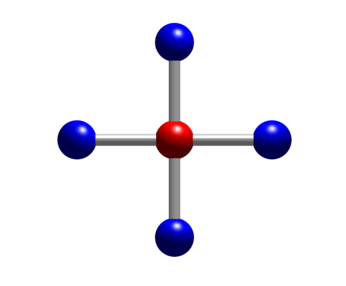

El cual nos permite calcular los valores de $u(x,t)$ en el espacio discretizado: $x_0=0,x_1,x_2,\ldots, x_M=L$, $t_0=0, t_1, t_2, \ldots, t_N=T$, espaciados uniformamente por $h = \Delta x$ y $k=\Delta t$.



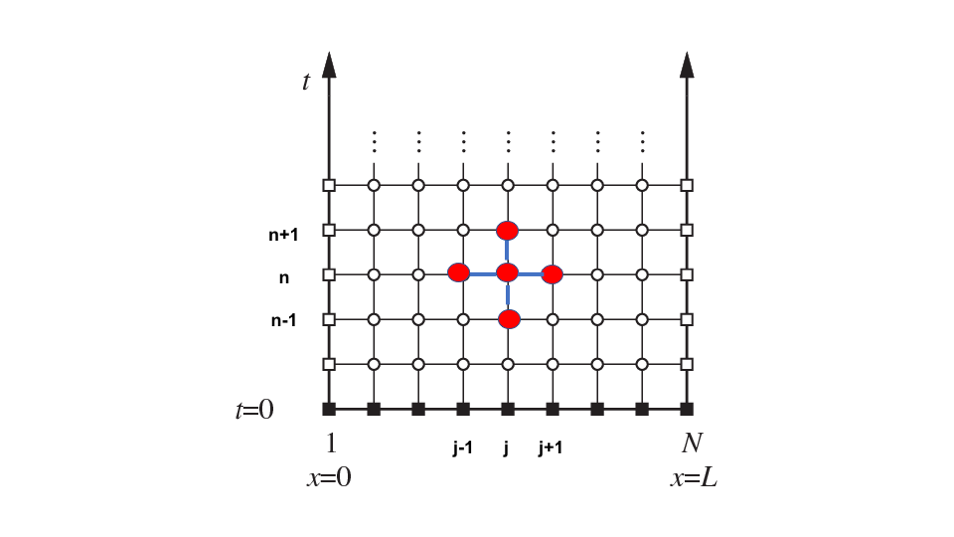


Para inicial el algoritmo tendremos que calcular el primer nivel de $u(x,k)$ en $t=k$, usando sólo la información de la condición inicial, con otro esténcil de 4 puntos similar al que utilizamos en la Ecuación de Calor.

Una vez hecho esto, ya podremos calcular todos los valores futuros de $u(x,t+k)$ ya que se conocen los valores de $u(x,t)$ y $u(x,t-k)$.

**Ecuación de Onda en diferencias finitas**

Si definimos $u(x,t) = u(jh, nk) = u_j^n$, la ecuación de onde la podemos expresar

$$\begin{equation*}
\frac{u_j^{n+1} - 2 u_j^n + u_j^{n-1}}{k^2} = c^2
\frac{u_{j+1}^n - 2 u_j^n + u_{j-1}^n}{h^2}
\end{equation*}$$
y despejamos para el valor desconocido $u_j^{n+1}$

$$\begin{equation*}
u_j^{n+1} = 2 u_j^n - u_j^{n-1} + C^2 (u_{j+1}^n - 2 u_j^n + u_{j-1}^n)
\end{equation*}$$
donde hemos introducido la constante $C^2 = c^2 k^2/h^2$, conocida como la constante de Courant.

**Iniciando el algoritmo**

Como no se puede aplicar el esténcil de 5 puntos pata calcular el primer nivel usaremos un esténcil similar de 4 puntos con la información de la condición inicial para calcular $u(x,t=k)$.

Remplazamos la condición inicial por diferencias finitas centradas de segundo orden

$$\begin{equation*}
\frac{\partial}{\partial t} u_j^0 = 
\frac{u_j^1 - u_j^{-1}}{2k}  = 0 
\end{equation*}$$
lo que indica que $u_j^1 = u_j^{-1}$.

Sustituimos la igualdad anterior en la ecuación de onda y nos queda que

$$\begin{equation*}
u_j^1 = u_j^0 + \frac{C^2}{2} (u_{j+1}^0 -2 u_j^0 + u_{j-1}^0)
\end{equation*}$$
Y ya tendremos dos niveles de valores para $u(x,t)$ para calcular los valores de $u_j^{n+1}$ usando el esténcil de 5 puntos.

In [22]:
# Importamos algunas bibliotecas necesarias

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from numpy import linspace, zeros

%matplotlib inline
plt.style.use('bmh')

In [23]:
# Se define una función que resuelve la Ecuación de Onda 

def solver(I, V, f, c, L, Nx, C, T, user_action=None):
    """Resuelve u_tt=c^2*u_xx + f sobre (0,L)x(0,T]."""
    x = linspace(0, L, Nx+1) # Malla en x
    dx = x[1] - x[0]
    dt = C*dx/c
    Nt = int(round(T/dt))
    t = linspace(0, Nt*dt, Nt+1) # Malla en t
    C2 = C**2 # Simplificar la ecuación
    
    if f is None or f == 0 :
        f = lambda x, t: 0
    
    if V is None or V == 0:
        V = lambda x: 0
    u = zeros(Nx+1) # Solución al nuevo tiempo
    u_1 = zeros(Nx+1) # Solución 1 paso atrás en el tiempo
    u_2 = zeros(Nx+1) # Solución 2 pasos atrás en el tiempo
    
    import time; 
    #t0 = time.clock() # Mediremos el tiempo de CPU
    t0 = time.process_time()

    # Cargar la condición inicial en u_1
    for i in range(0,Nx+1):
        u_1[i] = I(x[i])

    if user_action is not None:
        user_action(u_1, x, t, 0)
    
    # Fórmula del primer paso
    n = 0
    for i in range(1, Nx):
        u[i] = u_1[i] + dt*V(x[i]) + \
        0.5*C2*(u_1[i-1] - 2*u_1[i] + u_1[i+1]) + \
        0.5*dt**2*f(x[i], t[n])
    u[0] = 0; u[Nx] = 0
    
    if user_action is not None:
        user_action(u, x, t, 1)
    
    # Redefinimos variables para volver a utilizar
    u_2[:], u_1[:] = u_1, u
    
    for n in range(1, Nt):
        # Actualiza los valores en el tiempo t[n+1]
        for i in range(1, Nx):
            u[i] = - u_2[i] + 2*u_1[i] + \
            C2*(u_1[i-1] - 2*u_1[i] + u_1[i+1]) + \
            dt**2*f(x[i], t[n])
        # Definimos la condición a la frontera
        u[0] = 0; u[Nx] = 0

        if user_action is not None:
            if user_action(u, x, t, n+1):
                break

        # Redefinimos variables antes del siguiente paso
        u_2[:], u_1[:] = u_1, u

    # cpu_time = t0 - time.clock()
    cpu_time = time.process_time() - t0
    return u, x, t, cpu_time

def user_action(u, x, t, n):
    "Define una acción del usuario para guardar y visualizar posteriormente los datos."
    global user_data
    if 'x' not in user_data:
        user_data['x'] = x
    if 'u' not in user_data:
        user_data['u'] = [(n, u)]
    else:
        user_data['u'].append((t[n], u.copy()))

In [24]:
# Ejemplo de una cuerda vibrante L=1, t=(0,0.25), c=100m/s
# Variables solver(I, V, f, c, L, Nx, C, T, user_action=None)
# I = Condición Incial
# V = Velocidad Inicial
# f = función de forzamiento 
# c = Velocidad de propagación
# L = Longitud de la cuerda
# Nx = Núm. de puntos en x
# C = c*k/h Constante de Courant < 1
# T = Tiempo final de Integración

user_data = {}
u, x, t, cpu_time = solver(lambda x: x*(1-x), None, None, 100, 1, 100, 0.1, 0.25, user_action=user_action)

In [25]:
print('u.spahe:', u.shape)
print('x.shape:', x.shape)
print('t.shape:', t.shape)
print('CPU time:',cpu_time)
print('dt = T/len(user_data['u']):', 0.25/len(user_data['u']))

u.spahe: (101,)
x.shape: (101,)
t.shape: (25001,)
CPU time: 9.516458600999982
dt = T/len(user_data[]): 9.99960001599936e-06


In [26]:
print(len(user_data['u']))
print(len(user_data['x']))
print(user_data['u'][0])
print(user_data['u'][25000])

25001
101
(0, array([ 0.        , -0.00926162, -0.01852886, -0.02776169, -0.03692143,
       -0.04600904, -0.05503034, -0.06395131, -0.07271634, -0.08127022,
       -0.08958708, -0.09768352, -0.1055713 , -0.11325885, -0.1207513 ,
       -0.12802659, -0.13506389, -0.14185458, -0.14838872, -0.15465333,
       -0.16063742, -0.16636029, -0.17185301, -0.17714456, -0.18227028,
       -0.18725419, -0.19208339, -0.1967364 , -0.20122542, -0.20555764,
       -0.20972722, -0.21372711, -0.21754039, -0.22113028, -0.22448677,
       -0.22761657, -0.23053757, -0.23326079, -0.23575586, -0.23802698,
       -0.24008708, -0.24193746, -0.24359641, -0.24507151, -0.24636388,
       -0.24746597, -0.24837129, -0.24907006, -0.24956018, -0.249859  ,
       -0.24996251, -0.249859  , -0.24956018, -0.24907006, -0.24837129,
       -0.24746597, -0.24636388, -0.24507151, -0.24359641, -0.24193746,
       -0.24008708, -0.23802698, -0.23575586, -0.23326079, -0.23053757,
       -0.22761657, -0.22448677, -0.22113028, -0.2

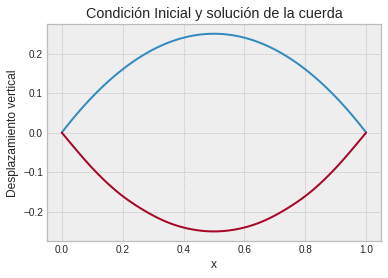

In [27]:
# Graficamos la solución
I = x*(1-x)

plt.xlabel('x')
plt.ylabel('Desplazamiento vertical')
plt.title('Condición Inicial y solución de la cuerda')
plt.plot(x,I)
plt.plot(x,u)

In [28]:
# No la ejecuto por cuestiones de memoria...
# Gráfica interactiva

@interact
def browse_simulation_result(n=(0, len(user_data['u']) - 1)):
    "Grafica un cuadro de la simulación."
    x = user_data['x']
    t, u = user_data['u'][n]
    plt.plot(x, u)
    plt.title('t = {:.2f}'.format(t))
    plt.ylim(-0.25, 0.25)
    plt.xlabel('x')
    plt.ylabel('Desplazamiento vertical')
    plt.title('Movimiento de la cuerda vibrante')

interactive(children=(IntSlider(value=12500, description='n', max=25000), Output()), _dom_classes=('widget-int…

In [29]:
# No la ejecuto porque crea un video... 
# Animación

from moviepy.video.io.bindings import mplfig_to_npimage
import moviepy.editor as mpy

duration = 20

fig, ax = plt.subplots(figsize=(4, 3), facecolor='white', dpi=92)
plt.tight_layout()

def make_frame_mpl(t):
    n = int(t / duration * (len(user_data['u']) - 1))
    ax.clear()
    x = user_data['x']
    t, u = user_data['u'][n]
    ax.plot(x, u)
    ax.set_title('t = {:.2f}'.format(t))
    ax.set_ylim(-0.25, 0.25)
    ax.set_xlabel('x (a. u.)')
    ax.set_ylabel('Desplazamiento vertical (a. u.)')
    return mplfig_to_npimage(fig) # imágen de la figura

animation = mpy.VideoClip(make_frame_mpl, duration=duration)
plt.close(fig)
animation.ipython_display(fps=20, width=600)

100%|█████████▉| 400/401 [00:25<00:00, 15.77it/s]


**Ejercicio 1:**

Modifique el algoritmo de diferencias finitas empleado anteriormente y resuelva la ecuación de onda amortiguada en una dimensión, dada por la ecuación

$$\begin{equation*}
\frac{\partial^2 u}{\partial t^2} + 
 b \frac{\partial u}{\partial t}
 = c^2 \left( 
  \frac{\partial^2 u}{\partial x^2}
   \right) \qquad x \in (0,L], t \in (0,T]
\end{equation*}$$
donde $b \ge 0 $ y $c$ son constantes.

Se proporcionan las condiciones iniciales y a la frontera para encontrar la solución.

$$\begin{eqnarray*}
u(x,0) & = & I(x) \\
\frac{\partial}{\partial t} u(x,0) & = & 0 \\
u(0,t) & = & 0 \\
u(L,t) & = & 0 \\
\end{eqnarray*}$$
Utilice diferencias finitas centradas de segundo orden para aproximar la primer derivada $\partial u/\partial t$.

$$\begin{equation*}
\frac{\partial}{\partial t} u(x,t) \approx \frac{u(x,t+k) - u(x,t-k)}{2k}
\end{equation*}$$
Suponga las mismas características del ejemplo presentado anteriormente $L=10$, $c=100$m/s, $t=(0,0.25)$, y coeficiente de amortiguamiento $b=0.5$ con condiciones iniciales $u(x,0) = x(1-x)$ y $\partial u(x,0) / \partial t = 0$ y condiciones a la frontera $u(0,t)=u(L,t)=0$.

In [30]:
# Se define una función que resuelve la Ecuación de Onda 

def solver(b,I, V, f, c, L, Nx, C, T, user_action=None):
    """Resuelve u_tt=c^2*u_xx + f sobre (0,L)x(0,T]."""
    x = linspace(0, L, Nx+1) # Malla en x
    dx = x[1] - x[0]
    dt = C*dx/c
    Nt = int(round(T/dt))
    t = linspace(0, Nt*dt, Nt+1) # Malla en t
    C2 = C**2 # Simplificar la ecuación

    k=dt
    C3=b*k/2
    C1=(1/(1+(b*k/2)))
    C4=(1/(1+C1*C3+C1))
    #C3=1/(1/)

    if f is None or f == 0 :
        f = lambda x, t: 0
    
    if V is None or V == 0:
        V = lambda x: 0
    u = zeros(Nx+1) # Solución al nuevo tiempo
    u_1 = zeros(Nx+1) # Solución 1 paso atrás en el tiempo
    u_2 = zeros(Nx+1) # Solución 2 pasos atrás en el tiempo
    
    import time; 
    #t0 = time.clock() # Mediremos el tiempo de CPU
    t0 = time.process_time()

    # Cargar la condición inicial en u_1
    for i in range(0,Nx+1):
        u_1[i] = I(x[i])   ##condicion al tiempo 0

    if user_action is not None:
        user_action(u_1, x, t, 0)
    
    # Fórmula del primer paso
    n = 0
    for i in range(1, Nx):
      # Actualiza los valores en el tiempo t[n+1]
        u[i] = C4*2*C1*(u_1[i]) + dt*V(x[i]) + \
        C4*(C1*C2*(u_1[i-1] - 2*u_1[i] + u_1[i+1])) + \
        dt**2*f(x[i], t[n])
        # Definimos la condición a la frontera
    u[0] = 0; u[Nx] = 0  
    
    if user_action is not None:
        user_action(u, x, t, 1)
    
    # Redefinimos variables para volver a utilizar
    u_2[:], u_1[:] = u_1, u
    
    for n in range(1, Nt):
        # Actualiza los valores en el tiempo t[n+1]
        for i in range(1, Nx):
            u[i] = -1*C1*u_2[i] + C1*2*u_1[i] + \
            (C1)*(C3*u_2[i]+C2*(u_1[i-1] - 2*u_1[i] + u_1[i+1]) )+ \
            dt**2*f(x[i], t[n])
        # Definimos la condición a la frontera
        u[0] = 0; u[Nx] = 0

        if user_action is not None:
            if user_action(u, x, t, n+1):
                break

        # Redefinimos variables antes del siguiente paso
        u_2[:], u_1[:] = u_1, u

    # cpu_time = t0 - time.clock()
    cpu_time = t0 - time.process_time()
    return u, x, t, cpu_time

def user_action(u, x, t, n):
    "Define una acción del usuario para guardar y visualizar posteriormente los datos."
    global user_data
    if 'x' not in user_data:
        user_data['x'] = x
    if 'u' not in user_data:
        user_data['u'] = [(n, u)]
    else:
        user_data['u'].append((t[n], u.copy()))

u.spahe: (1001,)
x.shape: (1001,)
t.shape: (25001,)
CPU time: -115.70905043699997
dt = T/len(user_data[]): 9.99960001599936e-06


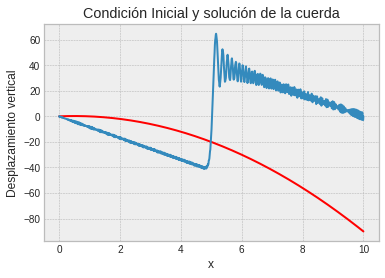

In [31]:
# Ejemplo de una cuerda vibrante L=1, t=(0,0.25), c=100m/s
# Variables solver(I, V, f, c, L, Nx, C, T, user_action=None)
# I = Condición Incial
# V = Velocidad Inicial
# f = función de forzamiento 
# c = Velocidad de propagación
# L = Longitud de la cuerda
# Nx = Núm. de puntos en x
# C = c*k/h Constante de Courant < 1
# T = Tiempo final de Integración
#def solver(b,I, V, f, c, L, Nx, C, T, user_action=None):
user_data = {}
u, x, t, cpu_time = solver(0.5,lambda x: x*(1-x), None,
                           None, 100, 10, 1000, 0.1, 0.25,
                           user_action=user_action)
print('u.spahe:', u.shape)
print('x.shape:', x.shape)
print('t.shape:', t.shape)
print('CPU time:',cpu_time)
print('dt = T/len(user_data['u']):', 0.25/len(user_data['u']))
I = x*(1-x)
plt.xlabel('x')
plt.ylabel('Desplazamiento vertical')
plt.title('Condición Inicial y solución de la cuerda')
plt.plot(x,I,color='red')
plt.plot(x,u)

**Ejercicio 2:**

Haga el desarrollo del algoritmo de diferencias finitas centradas para resolver la ecuación de onda en 1 dimensión si se tiene un término de forzamiento $f(x,t)$

$$\begin{equation*}
\frac{\partial^2 u}{\partial t^2} = c^2 \left( 
  \frac{\partial^2 u}{\partial x^2}
   \right) + f(x,t) \qquad x \in (0,L], t \in (0,T]
\end{equation*}$$
Con las condiciones iniciales y a la frontera para encontrar la solución.

$$\begin{eqnarray*}
u(x,0) & = & I(x) \\
\frac{\partial}{\partial t} u(x,0) & = & 0 \\
u(0,t) & = & 0 \\
u(L,t) & = & 0 \\
\end{eqnarray*}$$

In [32]:
# Se define una función que resuelve la Ecuación de Onda 

def solver(I, V, f, c, L, Nx, C, T, user_action=None):
    """Resuelve u_tt=c^2*u_xx + f sobre (0,L)x(0,T]."""
    x = linspace(0, L, Nx+1) # Malla en x
    dx = x[1] - x[0]
    dt = C*dx/c
    Nt = int(round(T/dt))
    t = linspace(0, Nt*dt, Nt+1) # Malla en t
    C2 = C**2 # Simplificar la ecuación
    
    if f is None or f == 0 :
        f = lambda x, t: 0
    
    if V is None or V == 0:
        V = lambda x: 0
    u = zeros(Nx+1) # Solución al nuevo tiempo
    u_1 = zeros(Nx+1) # Solución 1 paso atrás en el tiempo
    u_2 = zeros(Nx+1) # Solución 2 pasos atrás en el tiempo
    
    import time; 
    #t0 = time.clock() # Mediremos el tiempo de CPU
    t0 = time.process_time()

    # Cargar la condición inicial en u_1
    for i in range(0,Nx+1):
        u_1[i] = I(x[i])   ##condicion al tiempo 0

    if user_action is not None:
        user_action(u_1, x, t, 0)
    
    # Fórmula del primer paso
    n = 0
    for i in range(1, Nx):
        u[i] = u_1[i] + dt*V(x[i]) + \
        0.5*C2*(u_1[i-1] - 2*u_1[i] + u_1[i+1]) + \
        0.5*dt**2*f(x[i], t[n])
    u[0] = 0; u[Nx] = 0  ##condiciones a los extremos
    
    if user_action is not None:
        user_action(u, x, t, 1)
    
    # Redefinimos variables para volver a utilizar
    u_2[:], u_1[:] = u_1, u
    
    for n in range(1, Nt):
        # Actualiza los valores en el tiempo t[n+1]
        for i in range(1, Nx):
            u[i] = - u_2[i] + 2*u_1[i] + \
            C2*(u_1[i-1] - 2*u_1[i] + u_1[i+1]) + \
            dt**2*f(x[i], t[n])
        # Definimos la condición a la frontera
        u[0] = 0; u[Nx] = 0

        if user_action is not None:
            if user_action(u, x, t, n+1):
                break

        # Redefinimos variables antes del siguiente paso
        u_2[:], u_1[:] = u_1, u

    # cpu_time = t0 - time.clock()
    cpu_time = t0 - time.process_time()
    return u, x, t, cpu_time

def user_action(u, x, t, n):
    "Define una acción del usuario para guardar y visualizar posteriormente los datos."
    global user_data
    if 'x' not in user_data:
        user_data['x'] = x
    if 'u' not in user_data:
        user_data['u'] = [(n, u)]
    else:
        user_data['u'].append((t[n], u.copy()))


**Ecuación de Korteweg-De Vries (KdV)**

La Ecuación de KdV es una ecuación diferencial parcial no lineal que describe el movimiento de ondas superficiales de agua en aguas someras (poco profundas). Ver ejemplo.

La solución de la ecuación KdV son ondas solitarias o solitones. Los solitones son ondas que mantienen su forma y no se dispersan. Pueden interaccionar con otros solitones, mantienendo su forma sufriendo sólo un corrimiento en su fase.

La ecuación KdV describe la propagación de una onda superficial de amplitud $u(x,t)$ y es de la forma

$$\begin{equation*}
\frac{\partial u}{\partial t} +
6 u \frac{\partial u}{\partial x} +
\frac{\partial^3 u}{\partial x^3} 
 = 0
\end{equation*}$$
La solución analítica de esta ecuación es una secante hiperbólica

$$\begin{equation*}
u(x,t) = - \frac{1}{2} c \, \mathrm{sech}^2 
\left( \frac{\sqrt{c}}{2} (x - ct -a)  \right)  
\end{equation*}$$
donde $c$ es una velocidad de fase, $a$ una constante arbitraria.

NOTA: Recordemos cómo está definida la secante hiperbólica

$$\begin{equation*}
\mathrm{sech} \, x = \frac{1}{\cosh x} = \frac{2}{\exp(x) + \exp(-x)}
\end{equation*}$$

**Solución de la Ecuación de KdV para condiciones periódicas en el dominio $x$.**

Si se tienen condiciones periódicas en el dominio finito $x$, podemos entonces utilizar Transformadas de Fourier Discretas (Métodos Pseudoespectrales), que consiste calcular las derivadas parciales en $x$ apoyados con la Trasformadas Rápidas de Fourier utilzando la función scipy.fft.diff

Resolveremos el caso con 2 ondas solitarias de distinta amplitud y velocidad de propagación viajando dentro del dominio y buscaremos que interacciones (colisionen) y observaremos que no pierden su forma al colisionar, sólo mostrarán un corrimiento en su fase.

Calculando la solución.
Graficando una representación de la interacción de 2 ondas solitarias.


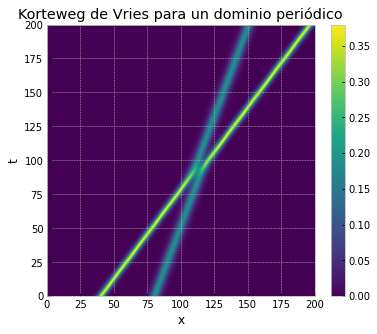

In [ ]:
#!python

import numpy as np
from scipy.integrate import odeint
from scipy.fftpack import diff as psdiff
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable

def kdv_exact(x, c):
    """Perfil de la solución exacta de la Ecuación KdV: 1 solitón sobre el eje real"""
    u = 0.5*c*np.cosh(0.5*np.sqrt(c)*x)**(-2)
    return u

def kdv(u, t, L):
    """Las ecuaciones diferenciales de la ecuación KdV, discretizada en x"""
    # Calcula las derivadas en x usando un método pseudoespectral (Transformada de Fourier)
    # Supone tener condiciones periódicas en la dirección x
    ux = psdiff(u, period=L)
    uxxx = psdiff(u, period=L, order=3)

    # Calcula el lado derecho de la ecuación de KdV 
    dudt = -6*u*ux - uxxx
    return dudt

def kdv_solution(u0, t, L):
    """Utiliza la función odeint para integrar la ecuación KdV sobre un dominio periódico.
    `u0` es la condición inicial, `t` es el arreglo de tiempos en los que se evaluará la ecuación, 
     y `L` es el tamaño del dominio periódico en x"""

    sol = odeint(kdv, u0, t, args=(L,), mxstep=5000)
    return sol

if __name__ == "__main__":
    # Define el tamaño del dominio y crea una malla discretizada.
    L = 200.0
    # Preferentemente N=potencia de 2^n (exigencia de la transformada rápida de Fourier FFT)
    N = 256
    dx = L / (N - 1.0) # dx < 0.8
    x = np.linspace(0, (1-1.0/N)*L, N) # L < N

    # Definir las condiciones iniciales
    # Dos solitones (ondas solitarias) viajando hacia la derecha en un dominio periódico
    u0 = kdv_exact(x-0.2*L, 0.76) + kdv_exact(x-0.4*L, 0.38)
    
    # Definir el tamaño del dominio en el tiempo
    # Tiempo final T
    T = 200
    t = np.linspace(0, T, 501)

    print("Calculando la solución.")
    sol = kdv_solution(u0, t, L)

    print("Graficando una representación de la interacción de 2 ondas solitarias.")

    import matplotlib.pyplot as plt

    plt.figure(figsize=(6,5))
    plt.imshow(sol[::-1, :], extent=[0,L,0,T])
    plt.colorbar()
    plt.xlabel('x')
    plt.ylabel('t')
    plt.axis('auto')
    plt.title('Korteweg de Vries para un dominio periódico')
    plt.show()

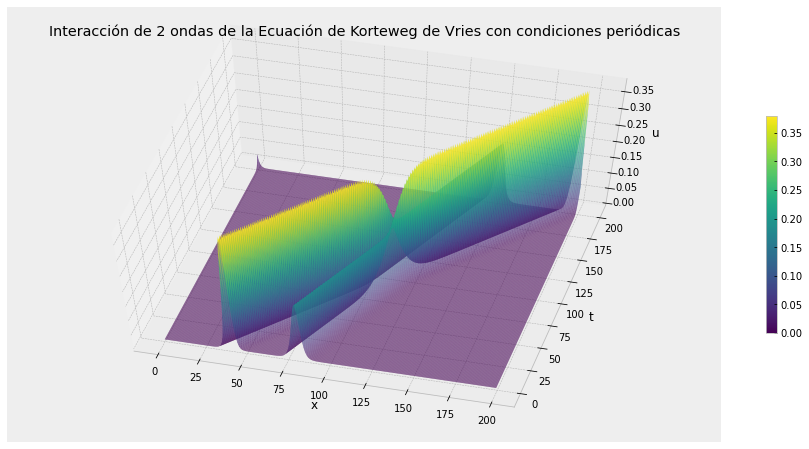

In [ ]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111, projection='3d')

SX, ST = np.meshgrid(x, t)
# Ver mapa de colores de Matplotlib
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
ax.plot_surface(SX, ST, sol, cmap='viridis', rstride=1, cstride=1, alpha=0.75)

# Grafica una tabla de valores 
m = cm.ScalarMappable(cmap='viridis')
m.set_array(sol)
plt.colorbar(m,shrink=0.5)

ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
ax.view_init(elev=60, azim=-75)
ax.set_title('Interacción de 2 ondas de la Ecuación de Korteweg de Vries con condiciones periódicas')
plt.show()

**Ejercicio 3.**

Resuelva la Ecuación KdV, para el caso de 2 solitones comenzando en $x01 = 0.25*L$ y $x02 = 0.75*L$, con velocidades $c1=0.75$ y $c2=0.01$ e integre hasta que una de las ondas llegue a la frontera.

Grafique las soluciones como en el ejemplo que se proporcionó.

Calculando la solución.
Graficando una representación de la interacción de 2 ondas solitarias.


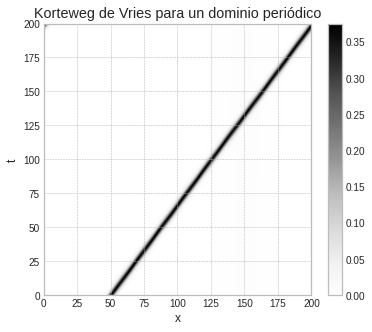

In [34]:
#Solución de la Ecuación de KdV en un dominio periódico

import numpy as np
from scipy.integrate import odeint
from scipy.fftpack import diff as psdiff
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable

def kdv_exact(x, c):
    """Perfil de la solución exacta de la Ecuación KdV: 1 solitón sobre el eje real"""
    u = 0.5*c*np.cosh(0.5*np.sqrt(c)*x)**(-2)
    return u

def kdv(u, t, L):
    """Las ecuaciones diferenciales de la ecuación KdV, discretizada en x"""
    # Calcula las derivadas en x usando un método pseudoespectral (Transformada de Fourier)
    # Supone tener condiciones periódicas en la dirección x
    ux = psdiff(u, period=L)
    uxxx = psdiff(u, period=L, order=3)

    # Calcula el lado derecho de la ecuación de KdV 
    dudt = -6*u*ux - uxxx
    return dudt

def kdv_solution(u0, t, L):
    """Utiliza la función odeint para integrar la ecuación KdV sobre un dominio periódico.
    `u0` es la condición inicial, `t` es el arreglo de tiempos en los que se evaluará la ecuación, 
     y `L` es el tamaño del dominio periódico en x"""

    sol = odeint(kdv, u0, t, args=(L,), mxstep=5000)
    return sol

if __name__ == "__main__":
    # Define el tamaño del dominio y crea una malla discretizada.
    L = 200.0
    # Preferentemente N=potencia de 2^n (exigencia de la transformada rápida de Fourier FFT)
    Nx = 256

    dx = L / (Nx - 1.0) # dx < 0.8
    x = np.linspace(0, (1-1.0/Nx)*L, Nx) # L < N

    # Definir las condiciones iniciales
    # Dos solitones (ondas solitarias) viajando hacia la derecha en un dominio periódico
    # Un soliton a la izquierda del otro. Posicionados en x-x01 y x-x02, 
    # Con velocidades c1 > c2 que provocará que colisionen entre si (el primero alcance al segundo)
    x01 = 0.25*L
    x02 = 0.75*L
    c1= 0.75
    c2= 0.01
    u0 = kdv_exact(x-x01, c1) + kdv_exact(x-x02, c2) #+ kdv_exact(x02+L/10-x, 0.9*c2)
    
    # Definir el tamaño del dominio en el tiempo
    # Tiempo final T
    T = 200
    Nt = 501
    t = np.linspace(0, T, Nt)

    print("Calculando la solución.")
    sol = kdv_solution(u0, t, L)

    print("Graficando una representación de la interacción de 2 ondas solitarias.")

    import matplotlib.pyplot as plt

    plt.figure(figsize=(6,5))
    plt.imshow(sol[::-1, :], extent=[0,L,0,T])
    
    plt.colorbar()
    plt.xlabel('x')
    plt.ylabel('t')
    plt.axis('auto')
    plt.title('Korteweg de Vries para un dominio periódico')
    
    plt.show()


Calculando la solución.
Graficando una representación de la interacción de 2 ondas solitarias.


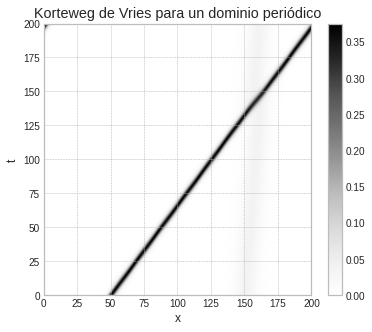

In [33]:
#Solución de la Ecuación de KdV en un dominio periódico

import numpy as np
from scipy.integrate import odeint
from scipy.fftpack import diff as psdiff
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable

def kdv_exact(x, c):
    """Perfil de la solución exacta de la Ecuación KdV: 1 solitón sobre el eje real"""
    u = 0.5*c*np.cosh(0.5*np.sqrt(c)*x)**(-2)
    return u

def kdv(u, t, L):
    """Las ecuaciones diferenciales de la ecuación KdV, discretizada en x"""
    # Calcula las derivadas en x usando un método pseudoespectral (Transformada de Fourier)
    # Supone tener condiciones periódicas en la dirección x
    ux = psdiff(u, period=L)
    uxxx = psdiff(u, period=L, order=3)

    # Calcula el lado derecho de la ecuación de KdV 
    dudt = -6*u*ux - uxxx
    return dudt

def kdv_solution(u0, t, L):
    """Utiliza la función odeint para integrar la ecuación KdV sobre un dominio periódico.
    `u0` es la condición inicial, `t` es el arreglo de tiempos en los que se evaluará la ecuación, 
     y `L` es el tamaño del dominio periódico en x"""

    sol = odeint(kdv, u0, t, args=(L,), mxstep=5000)
    return sol

if __name__ == "__main__":
    # Define el tamaño del dominio y crea una malla discretizada.
    L = 200.0
    # Preferentemente N=potencia de 2^n (exigencia de la transformada rápida de Fourier FFT)
    Nx = 256

    dx = L / (Nx - 1.0) # dx < 0.8
    x = np.linspace(0, (1-1.0/Nx)*L, Nx) # L < N

    # Definir las condiciones iniciales
    # Dos solitones (ondas solitarias) viajando hacia la derecha en un dominio periódico
    # Un soliton a la izquierda del otro. Posicionados en x-x01 y x-x02, 
    # Con velocidades c1 > c2 que provocará que colisionen entre si (el primero alcance al segundo)
    x01 = 0.25*L
    x02 = 0.75*L
    c1= 0.75
    c2= 0.075
    u0 = kdv_exact(x-x01, c1) + kdv_exact(x-x02, c2) #+ kdv_exact(x02+L/10-x, 0.9*c2)
    
    # Definir el tamaño del dominio en el tiempo
    # Tiempo final T
    T = 200
    Nt = 501
    t = np.linspace(0, T, Nt)

    print("Calculando la solución.")
    sol = kdv_solution(u0, t, L)

    print("Graficando una representación de la interacción de 2 ondas solitarias.")

    import matplotlib.pyplot as plt

    plt.figure(figsize=(6,5))
    plt.imshow(sol[::-1, :], extent=[0,L,0,T])
    plt.colorbar()
    plt.xlabel('x')
    plt.ylabel('t')
    plt.axis('auto')
    plt.title('Korteweg de Vries para un dominio periódico')
    plt.show()

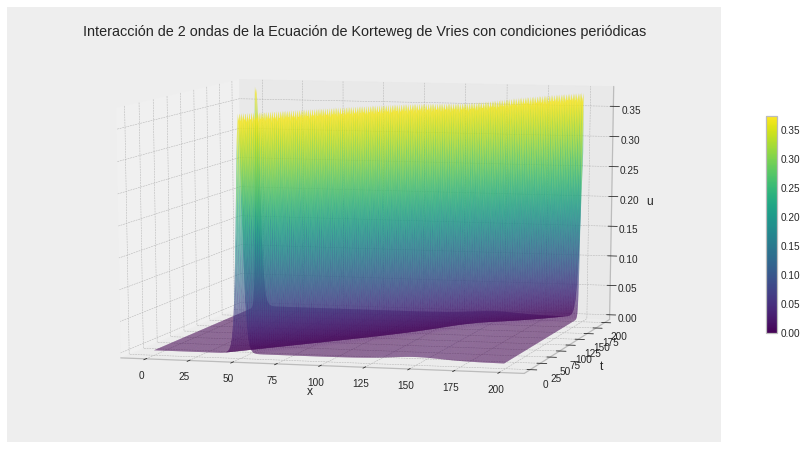

In [35]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111, projection='3d')

SX, ST = np.meshgrid(x, t)
# Ver mapa de colores de Matplotlib
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
ax.plot_surface(SX, ST, sol, cmap='viridis', rstride=1, cstride=1, alpha=0.75)

# Grafica una tabla de valores 
m = cm.ScalarMappable(cmap='viridis')
m.set_array(sol)
plt.colorbar(m,shrink=0.5)

ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
ax.view_init(elev=10, azim=-75)
ax.set_title('Interacción de 2 ondas de la Ecuación de Korteweg de Vries con condiciones periódicas')
plt.show()

**Ejercicio 4:**

Resuelva la Ecuación KdV, para el caso de 3 solitones comenzando en $x01 = 0.25*L$, $x02=0.5*L$, y $x03 = 0.75*L$, con velocidades $c1=0.75$, $c2=0.5$ y $c3=0.25$ e integre hasta que una de las ondas llegue a la frontera.

Grafique las soluciones.

Calculando la solución.
Graficando una representación de la interacción de 2 ondas solitarias.


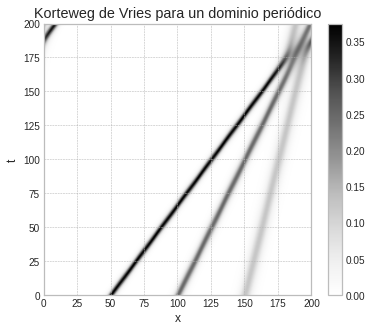

In [36]:
#Solución de la Ecuación de KdV en un dominio periódico

import numpy as np
from scipy.integrate import odeint
from scipy.fftpack import diff as psdiff
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable

def kdv_exact(x, c):
    """Perfil de la solución exacta de la Ecuación KdV: 1 solitón sobre el eje real"""
    u = 0.5*c*np.cosh(0.5*np.sqrt(c)*x)**(-2)
    return u

def kdv(u, t, L):
    """Las ecuaciones diferenciales de la ecuación KdV, discretizada en x"""
    # Calcula las derivadas en x usando un método pseudoespectral (Transformada de Fourier)
    # Supone tener condiciones periódicas en la dirección x
    ux = psdiff(u, period=L)
    uxxx = psdiff(u, period=L, order=3)

    # Calcula el lado derecho de la ecuación de KdV 
    dudt = -6*u*ux - uxxx
    return dudt

def kdv_solution(u0, t, L):
    """Utiliza la función odeint para integrar la ecuación KdV sobre un dominio periódico.
    `u0` es la condición inicial, `t` es el arreglo de tiempos en los que se evaluará la ecuación, 
     y `L` es el tamaño del dominio periódico en x"""

    sol = odeint(kdv, u0, t, args=(L,), mxstep=5000)
    return sol

if __name__ == "__main__":
    # Define el tamaño del dominio y crea una malla discretizada.
    L = 200.0
    # Preferentemente N=potencia de 2^n (exigencia de la transformada rápida de Fourier FFT)
    Nx = 256

    dx = L / (Nx - 1.0) # dx < 0.8
    x = np.linspace(0, (1-1.0/Nx)*L, Nx) # L < N

    # Definir las condiciones iniciales
    # Dos solitones (ondas solitarias) viajando hacia la derecha en un dominio periódico
    # Un soliton a la izquierda del otro. Posicionados en x-x01 y x-x02, 
    # Con velocidades c1 > c2 que provocará que colisionen entre si (el primero alcance al segundo)
    x01 = 0.25*L
    x02 = 0.5*L
    x03 = 0.75*L
    c1= 0.75
    c2= 0.5
    c3= 0.25
    u0 = kdv_exact(x-x01, c1) + kdv_exact(x-x02, c2) + kdv_exact(x-x03,c3)#+ kdv_exact(x02+L/10-x, 0.9*c2)
    
    # Definir el tamaño del dominio en el tiempo
    # Tiempo final T
    T = 200
    Nt = 501
    t = np.linspace(0, T, Nt)

    print("Calculando la solución.")
    sol = kdv_solution(u0, t, L)

    print("Graficando una representación de la interacción de 2 ondas solitarias.")

    import matplotlib.pyplot as plt

    plt.figure(figsize=(6,5))
    plt.imshow(sol[::-1, :], extent=[0,L,0,T])
    plt.colorbar()
    plt.xlabel('x')
    plt.ylabel('t')
    plt.axis('auto')
    plt.title('Korteweg de Vries para un dominio periódico')
    plt.show()


Calculando la solución.
Graficando una representación de la interacción de 2 ondas solitarias.


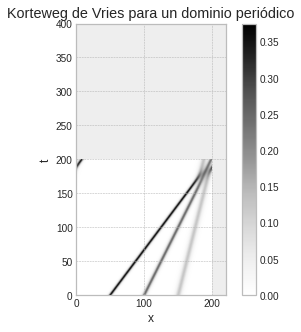

In [37]:
    Nt = 1002
    t = np.linspace(0, T, Nt)

    print("Calculando la solución.")
    sol = kdv_solution(u0, t, L)

    print("Graficando una representación de la interacción de 2 ondas solitarias.")

    import matplotlib.pyplot as plt

    plt.figure(figsize=(6,5))
    plt.imshow(sol[::-1, :], extent=[0,L,0,T])
    #Aqui no movemos porque solo lo ajsuta a la escala
    plt.colorbar()
    plt.xlabel('x')
    plt.ylabel('t')
    plt.axis([0,L+20,0,400])
    plt.title('Korteweg de Vries para un dominio periódico')
    plt.show()

**Ejemplo 3.**

N: 200
D: 0.25
Mx: 50
My 50
dx,dy; 0.04 0.04
nsteps: 200


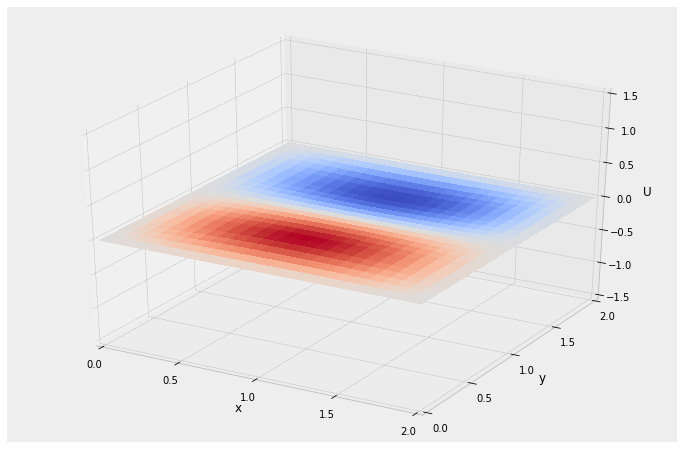

paso: 10.0 t= 0.285


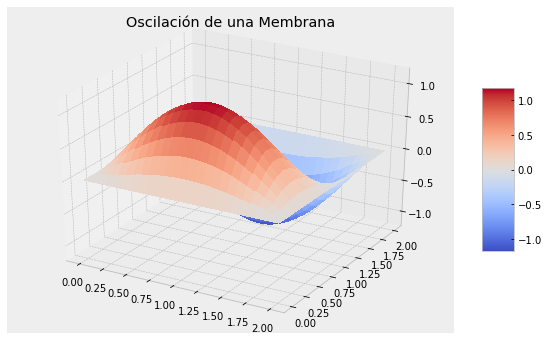

paso: 20.0 t= 0.585


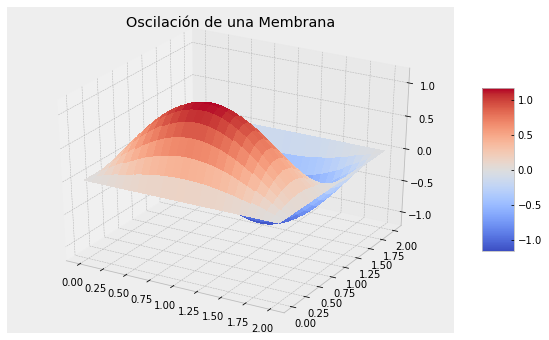

paso: 30.0 t= 0.885


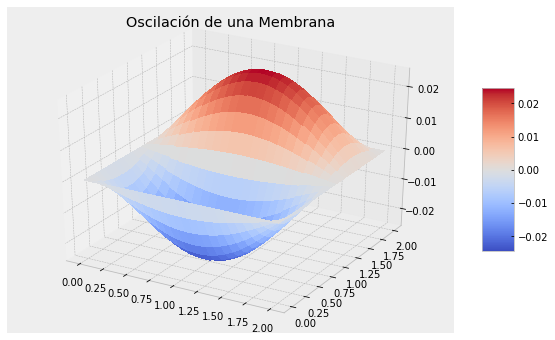

paso: 40.0 t= 1.185


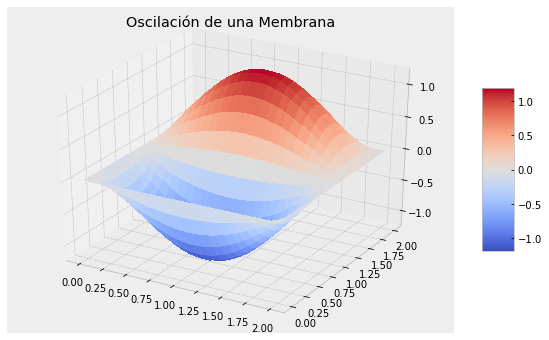

paso: 50.0 t= 1.4849999999999999


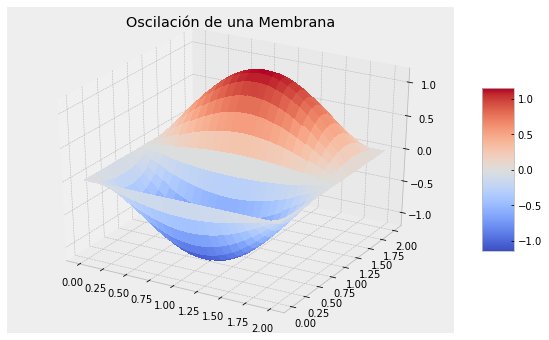

paso: 60.0 t= 1.785


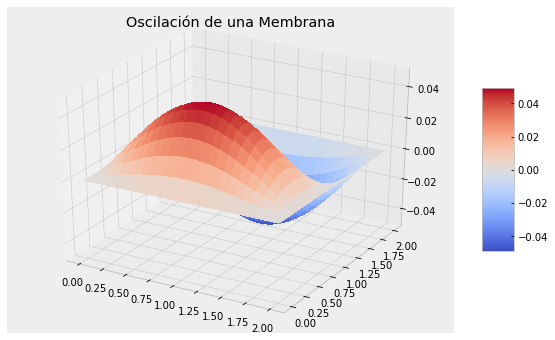

paso: 70.0 t= 2.085


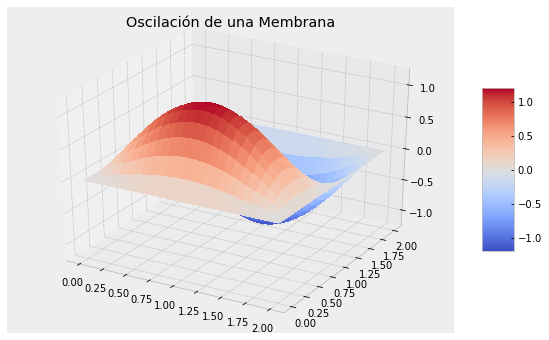

paso: 80.0 t= 2.385


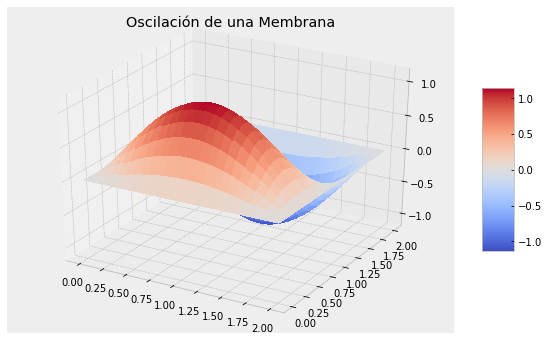

paso: 90.0 t= 2.685


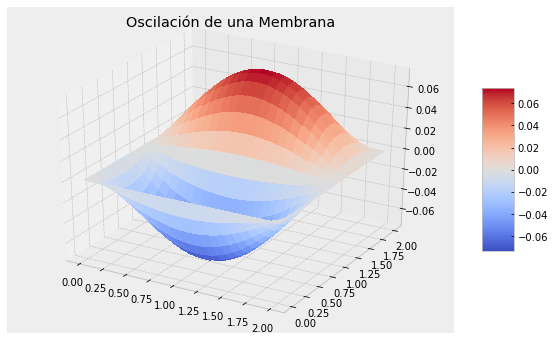

paso: 100.0 t= 2.985


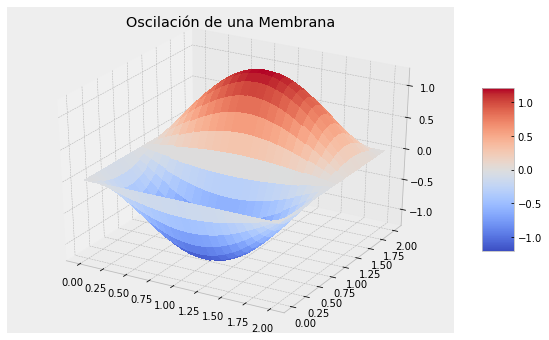

In [ ]:
#!python 
#Solución de la Ecuación de Onda en 2D: Utt = (Uxx+Uyy)
# Método de Diferencias Finitas 

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

# Se define la Clase general que incluye todas las funciones
class WaveEquationFD:
    
    def __init__(self, N, D, Mx, My):
        self.N = N
        print('N:',N)
        self.D = D
        print('D:',D)
        self.Mx = Mx
        print('Mx:',Mx)
        self.My = My
        print('My',My)
        self.tend = 6
        self.xmin = 0
        self.xmax = 2
        self.ymin = 0
        self.ymax = 2
        self.initialization()
        self.eqnApprox()
           
    def initialization(self):
        self.dx = (self.xmax - self.xmin)/self.Mx
        self.dy = (self.ymax - self.ymin)/self.My
        print('dx,dy;',self.dx,self.dy)
        
        self.x = np.arange(self.xmin, self.xmax+self.dx, self.dx)
        self.y = np.arange(self.ymin, self.ymax+self.dy, self.dy)
        
        #----- Initial condition -----#
        self.u0 = lambda r, s: 0.1*np.sin(np.pi*r)*np.sin(np.pi*s/2)
        
        #----- Initial velocity -----#
        self.v0 = lambda a, b: 0
        
        #----- Boundary conditions -----#
        self.bxyt = lambda left, right, time: 0
        
        self.dt = (self.tend - 0)/self.N
        self.t = np.arange(0, self.tend+self.dt/2, self.dt)
        
        # Assertion for the condition of r < 1, for stability
        r = 4*self.D*self.dt**2/(self.dx**2+self.dy**2);
        assert r < 1, "r is bigger than 1!"

            
    def eqnApprox(self):
        #----- Approximation equation properties -----#
        self.rx = self.D*self.dt**2/self.dx**2
        self.ry = self.D*self.dt**2/self.dy**2
        self.rxy1 = 1 - self.rx - self.ry 
        self.rxy2 = self.rxy1*2

        #----- Initialization matrix u for solution -----#
        self.u = np.zeros((self.Mx+1, self.My+1))
        self.ut = np.zeros((self.Mx+1, self.My+1))
        self.u_1 = self.u.copy()
        
        #----- Fills initial condition and initial velocity -----#
        for j in range(1, self.Mx):
            for i in range(1, self.My):
                self.u[i,j] = self.u0(self.x[i], self.y[j])
                self.ut[i,j] = self.v0(self.x[i], self.y[j])
        
    
    def solve_and_animate(self):
        
        u_2 = np.zeros((self.Mx+1, self.My+1))
        
        xx, yy = np.meshgrid(self.x, self.y)
         
        fig = plt.figure(figsize=(12,8))        
        ax = fig.add_subplot(111, projection='3d')
        #ax = plt.axes(projection ='3d')
        
        wframe = None
        
        k = 0
        nsteps = self.N
        print('nsteps:',nsteps)
        
        while k < nsteps:
            if wframe:
                ax.collections.remove(wframe)
                
            self.t = k*self.dt
            
            #----- Fills in boundary condition along y-axis (vertical, columns 0 and Mx) -----#
            for i in range(self.My+1):
                self.u[i, 0] = self.bxyt(self.x[0], self.y[i], self.t)
                self.u[i, self.Mx] = self.bxyt(self.x[self.Mx], self.y[i], self.t)
                
            for j in range(self.Mx+1):
                self.u[0, j] = self.bxyt(self.x[j], self.y[0], self.t)
                self.u[self.My, j] = self.bxyt(self.x[j], self.y[self.My], self.t)
                
            if k == 0:
                for j in range(1, self.My):
                    for i in range(1, self.Mx):
                        self.u[i,j] = 0.5*(self.rx*(self.u_1[i-1,j] + self.u_1[i+1,j])) \
                                + 0.5*(self.ry*(self.u_1[i,j-1] + self.u_1[i,j+1])) \
                                + self.rxy1*self.u[i,j] + self.dt*self.ut[i,j]
            else:
                for j in range(1, self.My):
                    for i in range(1, self.Mx):
                        self.u[i,j] = self.rx*(self.u_1[i-1,j] + self.u_1[i+1,j]) \
                            + self.ry*(self.u_1[i,j-1] + self.u_1[i,j+1]) \
                            + self.rxy2*self.u[i,j] - u_2[i,j]
                            
            u_2 = self.u_1.copy()
            self.u_1 = self.u.copy()

            wframe = ax.plot_surface(xx, yy, self.u, cmap=cm.coolwarm, linewidth=2, 
                    antialiased=False)
            
            ax.set_xlim3d(0, 2.0)
            ax.set_ylim3d(0, 2.0)
            ax.set_zlim3d(-1.5, 1.5)
            
            ax.set_xticks([0, 0.5, 1.0, 1.5, 2.0])
            ax.set_yticks([0, 0.5, 1.0, 1.5, 2.0])
            
            ax.set_xlabel("x")
            ax.set_ylabel("y")
            ax.set_zlabel("U")
            
            plt.pause(0.05)
            k += 0.5
            
            # Sección añadida para hacer gráficas cada 15 pasos 
            if (k < 101 and k%10 == 0):
                print('paso:',k, 't=', self.t)
                # Creating figure
                fig2 = plt.figure(figsize =(10, 6))
                ax2 = plt.axes(projection ='3d')
                # Creating color map
                my_cmap = plt.get_cmap('coolwarm')
                # Creating plot
                surf = ax2.plot_surface(xx, yy, self.u, cmap=cm.coolwarm, linewidth=2, 
                    antialiased=False)
                fig.colorbar(surf, ax = ax2,
                    shrink = 0.5, aspect = 5)
                ax2.set_title('Oscilación de una Membrana')
                # show plot
                plt.show()

# Se definen los parámetros con los que se va a ejecutar el código     
# N pasos de integración, parámetro de estabilidad < 0.5, Num.Puntos x, Núm.Puntos y

def main():
    simulator = WaveEquationFD(200, 0.25, 50, 50)
    simulator.solve_and_animate() # No funcionó en Google Colab
    plt.show()
    
if __name__ == "__main__":
    main()


**Ejercicio 5:**

En el ejemplo resuleto anterior, se mostró la evolución de la condición inicial

$$\begin{equation*}
u_0^{(2,1)}(x,y,0) = sin (\pi x) \sin (\frac{\pi y}{2})
\end{equation*}$$
mostrando el modo (1,2) de oscilación natural de la membrana (Ver estas animaciones).

En este Ejercicio se pide mostrar la evolución del modo (1,1), con la condición inicial

$$\begin{equation*}
u_0^{(1,1)}(x,y,0) = \sin (\frac{\pi x}{2}) \sin (\frac{\pi y}{2})
\end{equation*}$$

N: 200
D: 0.25
Mx: 50
My 50
dx,dy; 0.04 0.04
nsteps: 200


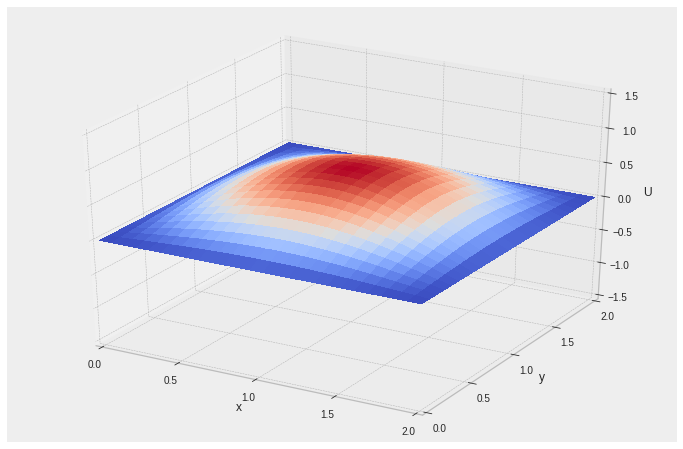

paso: 10.0 t= 0.285


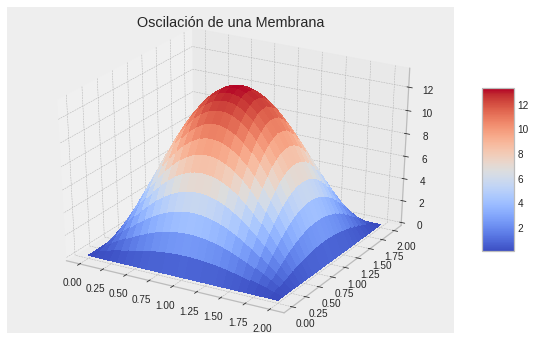

paso: 20.0 t= 0.585


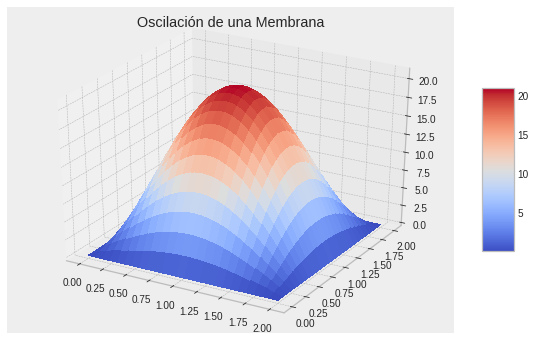

paso: 30.0 t= 0.885


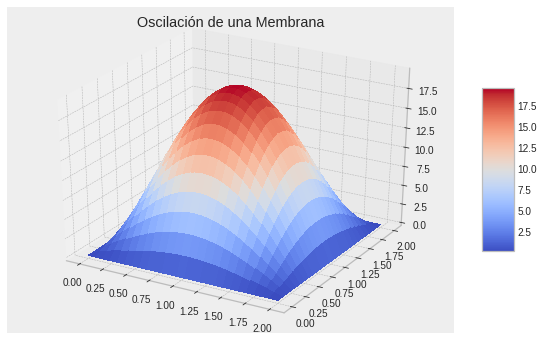

paso: 40.0 t= 1.185


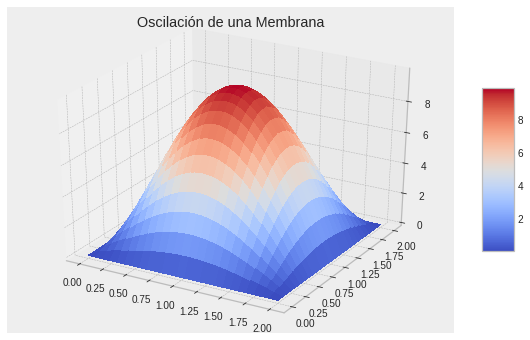

paso: 50.0 t= 1.4849999999999999


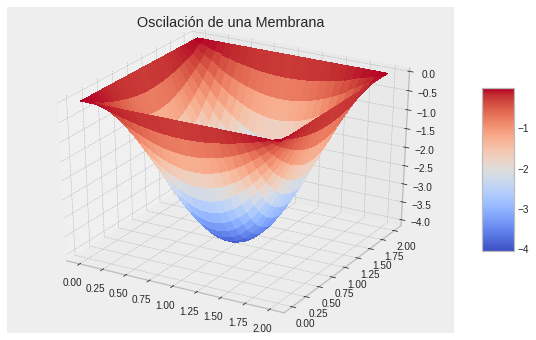

paso: 60.0 t= 1.785


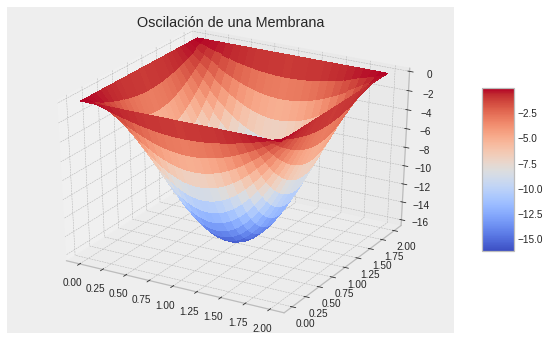

paso: 70.0 t= 2.085


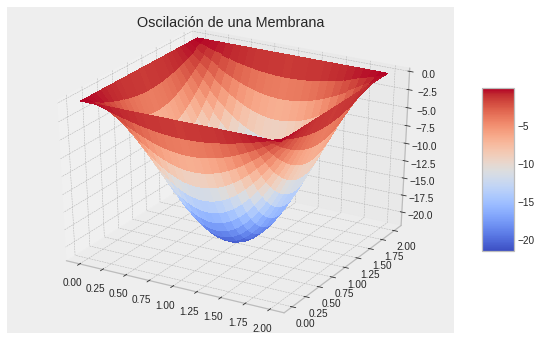

paso: 80.0 t= 2.385


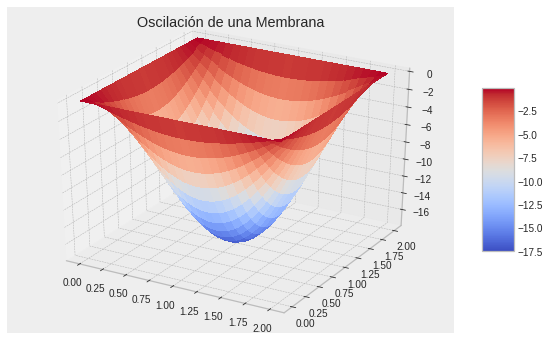

paso: 90.0 t= 2.685


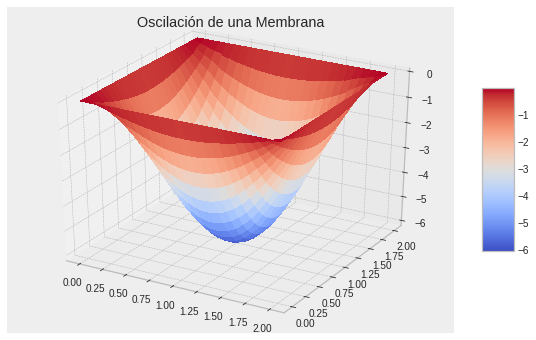

paso: 100.0 t= 2.985


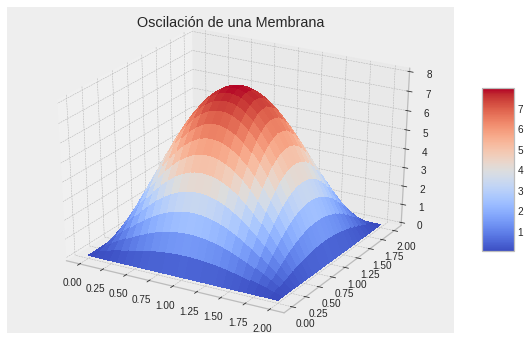

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

# Se define la Clase general que incluye todas las funciones
class WaveEquationFD:
    
    def __init__(self, N, D, Mx, My):
        self.N = N
        print('N:',N)
        self.D = D
        print('D:',D)
        self.Mx = Mx
        print('Mx:',Mx)
        self.My = My
        print('My',My)
        self.tend = 6
        self.xmin = 0
        self.xmax = 2
        self.ymin = 0
        self.ymax = 2
        self.initialization()
        self.eqnApprox()
           
    def initialization(self):
        self.dx = (self.xmax - self.xmin)/self.Mx
        self.dy = (self.ymax - self.ymin)/self.My
        print('dx,dy;',self.dx,self.dy)
        
        self.x = np.arange(self.xmin, self.xmax+self.dx, self.dx)
        self.y = np.arange(self.ymin, self.ymax+self.dy, self.dy)
        
        #----- Initial condition -----#
        self.u0 = lambda r, s: np.sin(np.pi*r/2)*np.sin(np.pi*s/2)
        
        #----- Initial velocity -----#
        self.v0 = lambda a, b: 0
        
        #----- Boundary conditions -----#
        self.bxyt = lambda left, right, time: 0
        
        self.dt = (self.tend - 0)/self.N
        self.t = np.arange(0, self.tend+self.dt/2, self.dt)
        
        # Assertion for the condition of r < 1, for stability
        r = 4*self.D*self.dt**2/(self.dx**2+self.dy**2);
        assert r < 1, "r is bigger than 1!"

            
    def eqnApprox(self):
        #----- Approximation equation properties -----#
        self.rx = self.D*self.dt**2/self.dx**2
        self.ry = self.D*self.dt**2/self.dy**2
        self.rxy1 = 1 - self.rx - self.ry 
        self.rxy2 = self.rxy1*2

        #----- Initialization matrix u for solution -----#
        self.u = np.zeros((self.Mx+1, self.My+1))
        self.ut = np.zeros((self.Mx+1, self.My+1))
        self.u_1 = self.u.copy()
        
        #----- Fills initial condition and initial velocity -----#
        for j in range(1, self.Mx):
            for i in range(1, self.My):
                self.u[i,j] = self.u0(self.x[i], self.y[j])
                self.ut[i,j] = self.v0(self.x[i], self.y[j])
        
    
    def solve_and_animate(self):
        
        u_2 = np.zeros((self.Mx+1, self.My+1))
        
        xx, yy = np.meshgrid(self.x, self.y)
         
        fig = plt.figure(figsize=(12,8))        
        ax = fig.add_subplot(111, projection='3d')
        #ax = plt.axes(projection ='3d')
        
        wframe = None
        
        k = 0
        nsteps = self.N
        print('nsteps:',nsteps)
        
        while k < nsteps:
            if wframe:
                ax.collections.remove(wframe)
                
            self.t = k*self.dt
            
            #----- Fills in boundary condition along y-axis (vertical, columns 0 and Mx) -----#
            for i in range(self.My+1):
                self.u[i, 0] = self.bxyt(self.x[0], self.y[i], self.t)
                self.u[i, self.Mx] = self.bxyt(self.x[self.Mx], self.y[i], self.t)
                
            for j in range(self.Mx+1):
                self.u[0, j] = self.bxyt(self.x[j], self.y[0], self.t)
                self.u[self.My, j] = self.bxyt(self.x[j], self.y[self.My], self.t)
                
            if k == 0:
                for j in range(1, self.My):
                    for i in range(1, self.Mx):
                        self.u[i,j] = 0.5*(self.rx*(self.u_1[i-1,j] + self.u_1[i+1,j])) \
                                + 0.5*(self.ry*(self.u_1[i,j-1] + self.u_1[i,j+1])) \
                                + self.rxy1*self.u[i,j] + self.dt*self.ut[i,j]
            else:
                for j in range(1, self.My):
                    for i in range(1, self.Mx):
                        self.u[i,j] = self.rx*(self.u_1[i-1,j] + self.u_1[i+1,j]) \
                            + self.ry*(self.u_1[i,j-1] + self.u_1[i,j+1]) \
                            + self.rxy2*self.u[i,j] - u_2[i,j]
                            
            u_2 = self.u_1.copy()
            self.u_1 = self.u.copy()

            wframe = ax.plot_surface(xx, yy, self.u, cmap=cm.coolwarm, linewidth=2, 
                    antialiased=False)
            
            ax.set_xlim3d(0, 2.0)
            ax.set_ylim3d(0, 2.0)
            ax.set_zlim3d(-1.5, 1.5)
            
            ax.set_xticks([0, 0.5, 1.0, 1.5, 2.0])
            ax.set_yticks([0, 0.5, 1.0, 1.5, 2.0])
            
            ax.set_xlabel("x")
            ax.set_ylabel("y")
            ax.set_zlabel("U")
            
            plt.pause(0.05)
            k += 0.5
            
            # Sección añadida para hacer gráficas cada 15 pasos 
            if (k < 101 and k%10 == 0):
                print('paso:',k, 't=', self.t)
                # Creating figure
                fig2 = plt.figure(figsize =(10, 6))
                ax2 = plt.axes(projection ='3d')
                # Creating color map
                my_cmap = plt.get_cmap('coolwarm')
                # Creating plot
                surf = ax2.plot_surface(xx, yy, self.u, cmap=cm.coolwarm, linewidth=2, 
                    antialiased=False)
                fig.colorbar(surf, ax = ax2,
                    shrink = 0.5, aspect = 5)
                ax2.set_title('Oscilación de una Membrana')
                # show plot
                plt.show()

# Se definen los parámetros con los que se va a ejecutar el código     
# N pasos de integración, parámetro de estabilidad < 0.5, Num.Puntos x, Núm.Puntos y

def main():
    simulator = WaveEquationFD(200, 0.25, 50, 50)
    simulator.solve_and_animate() # No funcionó en Google Colab
    plt.show()
    
if __name__ == "__main__":
    main()

**Ejercicio 6:**

En el mismo contexto que el problema anterior, muestra la evolución de la superposición modos (3,1)+1,3) dada la condición inicial

$$\begin{equation*}
u_0^{(3,1)+(1,3)}(x,y,0) = \sin (\frac{3 \pi x}{2}) \sin (\frac{\pi y}{2}) + \sin (\frac{\pi x}{2}) \sin (\frac{3 \pi y}{2})
\end{equation*}$$

N: 200
D: 0.25
Mx: 50
My 50
dx,dy; 0.04 0.04
nsteps: 200


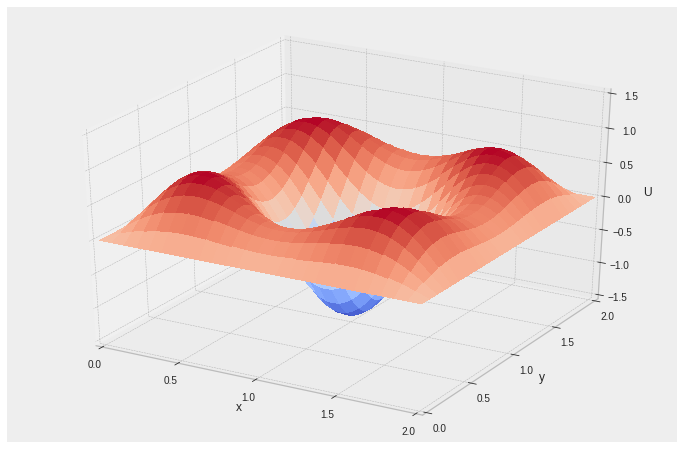

paso: 10.0 t= 0.285


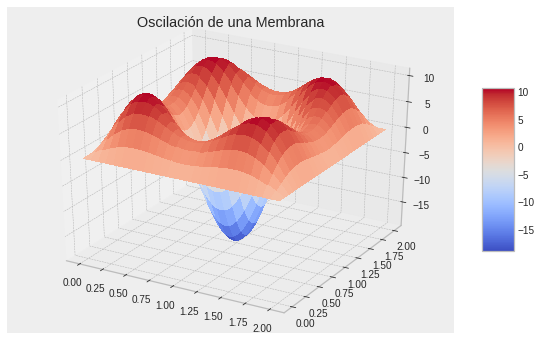

paso: 20.0 t= 0.585


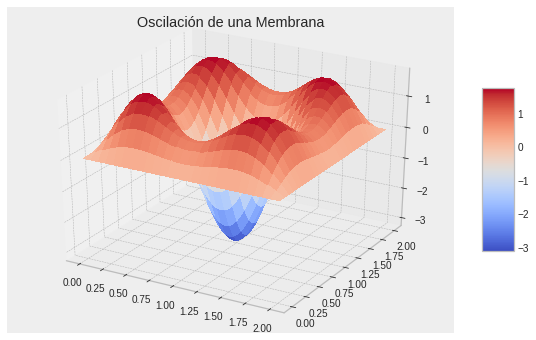

paso: 30.0 t= 0.885


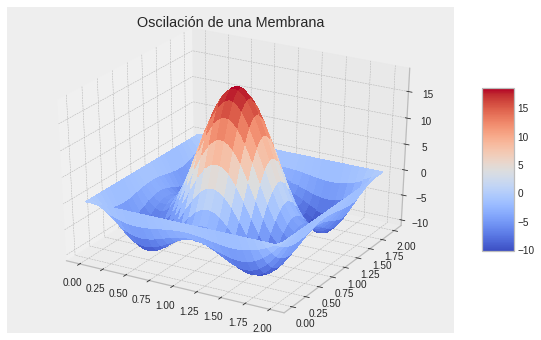

paso: 40.0 t= 1.185


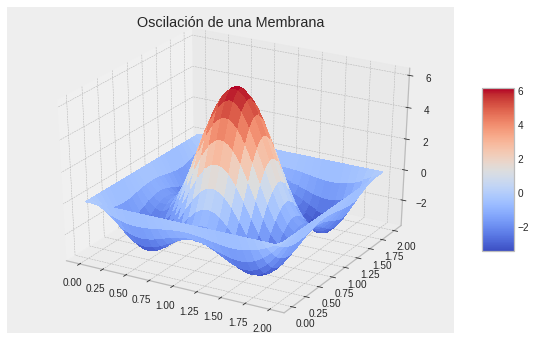

paso: 50.0 t= 1.4849999999999999


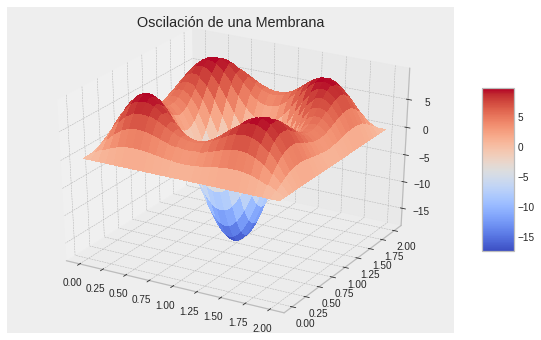

paso: 60.0 t= 1.785


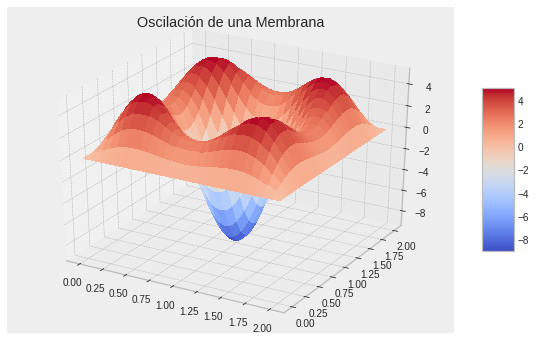

paso: 70.0 t= 2.085


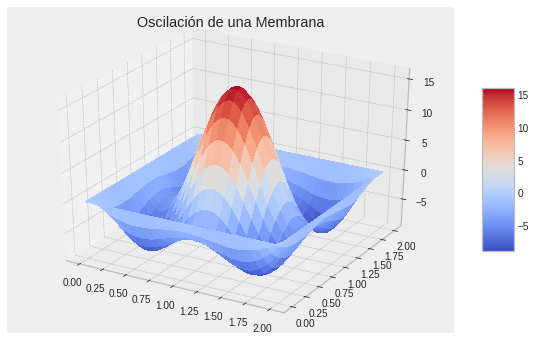

paso: 80.0 t= 2.385


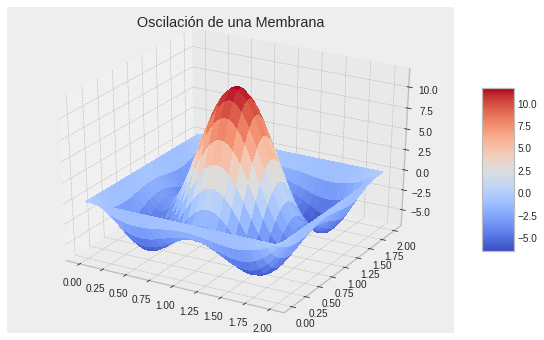

paso: 90.0 t= 2.685


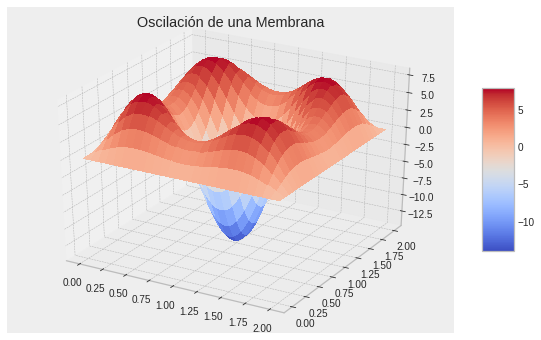

paso: 100.0 t= 2.985


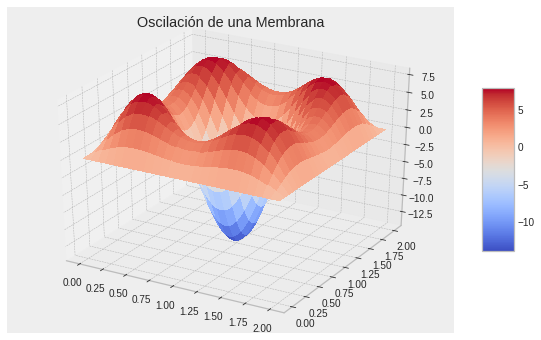

In [39]:
# Método de Diferencias Finitas 

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

# Se define la Clase general que incluye todas las funciones
class WaveEquationFD:
    
    def __init__(self, N, D, Mx, My):
        self.N = N
        print('N:',N)
        self.D = D
        print('D:',D)
        self.Mx = Mx
        print('Mx:',Mx)
        self.My = My
        print('My',My)
        self.tend = 6
        self.xmin = 0
        self.xmax = 2
        self.ymin = 0
        self.ymax = 2
        self.initialization()
        self.eqnApprox()
           
    def initialization(self):
        self.dx = (self.xmax - self.xmin)/self.Mx
        self.dy = (self.ymax - self.ymin)/self.My
        print('dx,dy;',self.dx,self.dy)
        
        self.x = np.arange(self.xmin, self.xmax+self.dx, self.dx)
        self.y = np.arange(self.ymin, self.ymax+self.dy, self.dy)
        
        #----- Initial condition -----#
        self.u0 = lambda r, s: np.sin(3*np.pi*r/2)*np.sin(np.pi*s/2)\
        +np.sin(np.pi*r/2)*np.sin(3*np.pi*s/2)
        
        #----- Initial velocity -----#
        self.v0 = lambda a, b: 0
        
        #----- Boundary conditions -----#
        self.bxyt = lambda left, right, time: 0
        
        self.dt = (self.tend - 0)/self.N
        self.t = np.arange(0, self.tend+self.dt/2, self.dt)
        
        # Assertion for the condition of r < 1, for stability
        r = 4*self.D*self.dt**2/(self.dx**2+self.dy**2);
        assert r < 1, "r is bigger than 1!"

            
    def eqnApprox(self):
        #----- Approximation equation properties -----#
        self.rx = self.D*self.dt**2/self.dx**2
        self.ry = self.D*self.dt**2/self.dy**2
        self.rxy1 = 1 - self.rx - self.ry 
        self.rxy2 = self.rxy1*2

        #----- Initialization matrix u for solution -----#
        self.u = np.zeros((self.Mx+1, self.My+1))
        self.ut = np.zeros((self.Mx+1, self.My+1))
        self.u_1 = self.u.copy()
        
        #----- Fills initial condition and initial velocity -----#
        for j in range(1, self.Mx):
            for i in range(1, self.My):
                self.u[i,j] = self.u0(self.x[i], self.y[j])
                self.ut[i,j] = self.v0(self.x[i], self.y[j])
        
    
    def solve_and_animate(self):
        
        u_2 = np.zeros((self.Mx+1, self.My+1))
        
        xx, yy = np.meshgrid(self.x, self.y)
         
        fig = plt.figure(figsize=(12,8))        
        ax = fig.add_subplot(111, projection='3d')
        #ax = plt.axes(projection ='3d')
        
        wframe = None
        
        k = 0
        nsteps = self.N
        print('nsteps:',nsteps)
        
        while k < nsteps:
            if wframe:
                ax.collections.remove(wframe)
                
            self.t = k*self.dt
            
            #----- Fills in boundary condition along y-axis (vertical, columns 0 and Mx) -----#
            for i in range(self.My+1):
                self.u[i, 0] = self.bxyt(self.x[0], self.y[i], self.t)
                self.u[i, self.Mx] = self.bxyt(self.x[self.Mx], self.y[i], self.t)
                
            for j in range(self.Mx+1):
                self.u[0, j] = self.bxyt(self.x[j], self.y[0], self.t)
                self.u[self.My, j] = self.bxyt(self.x[j], self.y[self.My], self.t)
                
            if k == 0:
                for j in range(1, self.My):
                    for i in range(1, self.Mx):
                        self.u[i,j] = 0.5*(self.rx*(self.u_1[i-1,j] + self.u_1[i+1,j])) \
                                + 0.5*(self.ry*(self.u_1[i,j-1] + self.u_1[i,j+1])) \
                                + self.rxy1*self.u[i,j] + self.dt*self.ut[i,j]
            else:
                for j in range(1, self.My):
                    for i in range(1, self.Mx):
                        self.u[i,j] = self.rx*(self.u_1[i-1,j] + self.u_1[i+1,j]) \
                            + self.ry*(self.u_1[i,j-1] + self.u_1[i,j+1]) \
                            + self.rxy2*self.u[i,j] - u_2[i,j]
                            
            u_2 = self.u_1.copy()
            self.u_1 = self.u.copy()

            wframe = ax.plot_surface(xx, yy, self.u, cmap=cm.coolwarm, linewidth=2, 
                    antialiased=False)
            
            ax.set_xlim3d(0, 2.0)
            ax.set_ylim3d(0, 2.0)
            ax.set_zlim3d(-1.5, 1.5)
            
            ax.set_xticks([0, 0.5, 1.0, 1.5, 2.0])
            ax.set_yticks([0, 0.5, 1.0, 1.5, 2.0])
            
            ax.set_xlabel("x")
            ax.set_ylabel("y")
            ax.set_zlabel("U")
            
            plt.pause(0.05)
            k += 0.5
            
            # Sección añadida para hacer gráficas cada 15 pasos 
            if (k < 101 and k%10 == 0):
                print('paso:',k, 't=', self.t)
                # Creating figure
                fig2 = plt.figure(figsize =(10, 6))
                ax2 = plt.axes(projection ='3d')
                # Creating color map
                my_cmap = plt.get_cmap('coolwarm')
                # Creating plot
                surf = ax2.plot_surface(xx, yy, self.u, cmap=cm.coolwarm, linewidth=2, 
                    antialiased=False)
                fig.colorbar(surf, ax = ax2,
                    shrink = 0.5, aspect = 5)
                ax2.set_title('Oscilación de una Membrana')
                # show plot
                plt.show()

# Se definen los parámetros con los que se va a ejecutar el código     
# N pasos de integración, parámetro de estabilidad < 0.5, Num.Puntos x, Núm.Puntos y

def main():
    simulator = WaveEquationFD(200, 0.25, 50, 50)
    simulator.solve_and_animate() # No funcionó en Google Colab
    plt.show()
    
if __name__ == "__main__":
    main()

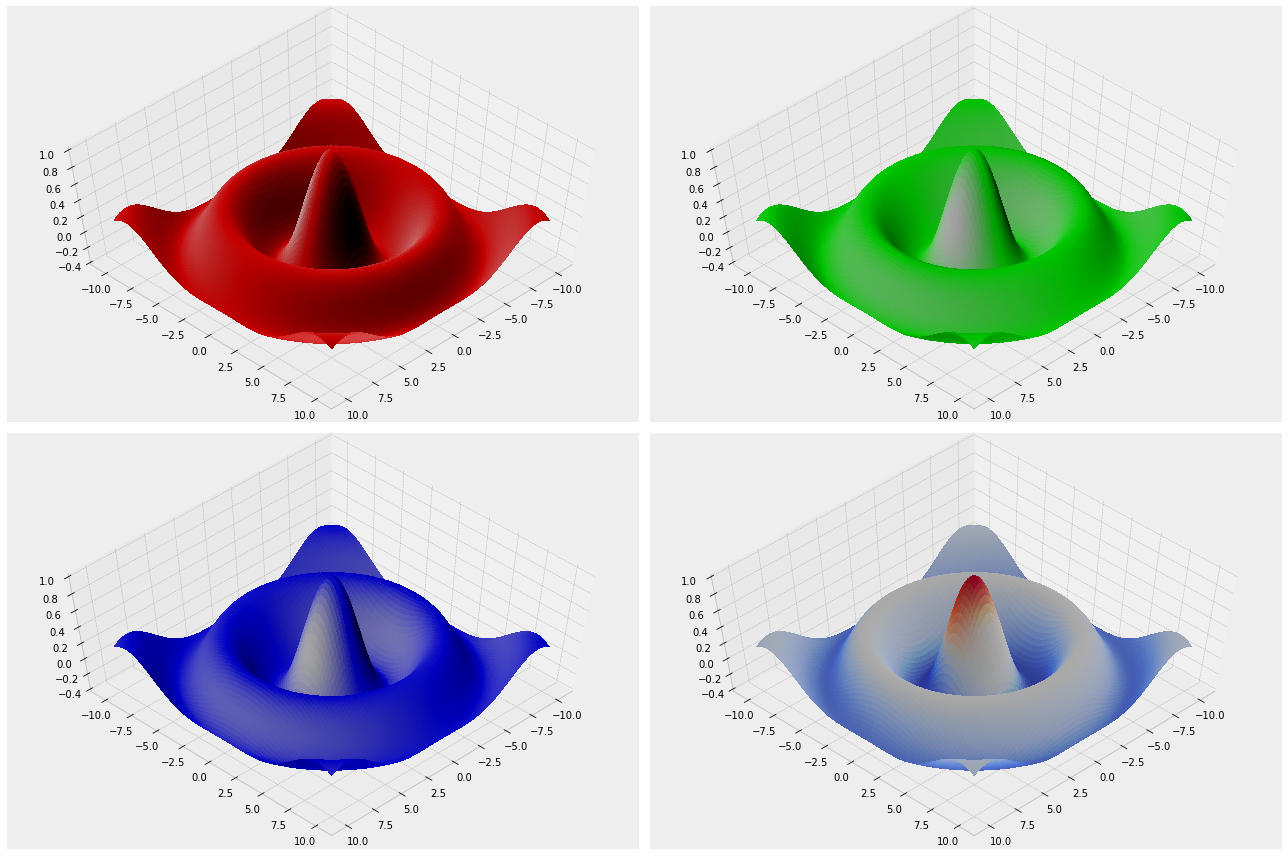

In [ ]:
# =========================================================================
# shading.py
# Author:   Jesse M. Kinder
# Created:  2015 Jul 27
# Modified: 2015 Jul 31
# -------------------------------------------------------------------------
# Demonstrate shading of surface plots using Matplotlib's LightSource.
# ------------------------------------------------------------------------- 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Import Bessel function.
from scipy.special import jn

# Import colormaps.
from matplotlib import cm

# Import lighting object for shading surface plots.
from matplotlib.colors import LightSource

# Define grid of points.
points = np.linspace(-10, 10, 101)
X, Y = np.meshgrid(points, points)
R = np.sqrt(X**2 + Y**2)
Z = jn(0,R)

# Create an rgb array for single-color surfaces.
white = np.ones((Z.shape[0], Z.shape[1], 3))
red = white * np.array([1,0,0])
green = white * np.array([0,1,0])
blue = white * np.array([0,0,1])

# Set view parameters for all subplots.
azimuth = 45
altitude = 60

# Create empty figure.
fig = plt.figure(figsize=(18,12))

# -------------------------------------------------------------------------
# Generate first subplot.
# ------------------------------------------------------------------------- 
# Create a light source object for light from
# 0 degrees azimuth, 0 degrees elevation.
light = LightSource(0, 0)

# Generate face colors for a shaded surface using either
# a color map or the uniform rgb color specified above.

illuminated_surface = light.shade_rgb(red, Z)

# Create a subplot with 3d plotting capabilities.
# This command will fail if Axes3D was not imported.
ax = fig.add_subplot(2,2,1, projection='3d')
ax.view_init(altitude, azimuth)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0,
                antialiased=False, facecolors=illuminated_surface)

# -------------------------------------------------------------------------
# Repeat the commands above for the other three subplots, but use different
# illumination angles and colors.
# ------------------------------------------------------------------------- 
light = LightSource(90, 0)
illuminated_surface = light.shade_rgb(green, Z)

ax = fig.add_subplot(2,2,2, projection='3d')
ax.view_init(altitude, azimuth)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0,
                antialiased=False, facecolors=illuminated_surface)

# ------------------------------------------------------------------------- 
light = LightSource(90, 45)
illuminated_surface = light.shade_rgb(blue, Z)

ax = fig.add_subplot(2,2,3, projection='3d')
ax.view_init(altitude, azimuth)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0,
                antialiased=False, facecolors=illuminated_surface)

# ------------------------------------------------------------------------- 
light = LightSource(180, 45)
illuminated_surface = light.shade(Z, cmap=cm.coolwarm)

ax = fig.add_subplot(2,2,4, projection='3d')
ax.view_init(altitude, azimuth)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0,
                antialiased=False, facecolors=illuminated_surface)

# ------------------------------------------------------------------------- 
plt.tight_layout()
#plt.savefig('shading.png')


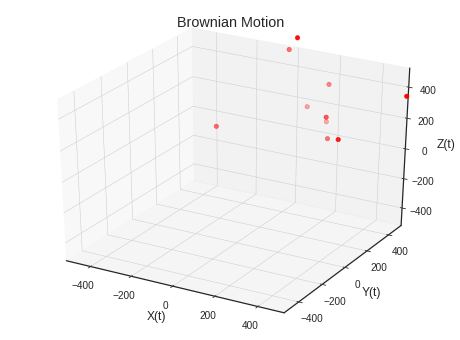

In [ ]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
rc('animation', html='jshtml')
from mpl_toolkits import mplot3d

plt.style.use('seaborn-white')
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')

N=10
x=500*np.random.random(N)
y=500*np.random.random(N)
z=500*np.random.random(N)

def frame(w):
    ax.clear()
    global x,y,z
    x=x+np.random.normal(loc=0.0,scale=50.0,size=10)
    y=y+np.random.normal(loc=0.0,scale=50.0,size=10)
    z=z+np.random.normal(loc=0.0,scale=50.0,size=10)

    plt.title("Brownian Motion")
    ax.set_xlabel('X(t)')
    ax.set_xlim3d(-500.0,500.0)
    ax.set_ylabel('Y(t)')
    ax.set_ylim3d(-500.0,500.0)
    ax.set_zlabel('Z(t)')
    ax.set_zlim3d(-500.0,500.0) 
    plot=ax.scatter3D(x, y, z, c='r')
    return plot

anim = animation.FuncAnimation(fig, frame, frames=10, blit=False, repeat=True)

anim

In [ ]:
frame

<function __main__.frame>

One-dimensional Schrodinger equation - time evolution
Wavepacket energy:    0.012493255501361697
Potential type:       free
Potential height V0:  0.01
Barrier thickness:    15


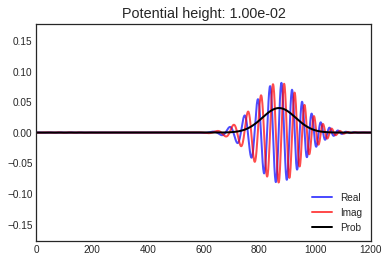

In [ ]:
# Test: Solución Numérica de la Ecuación de Schrödinger en una dimensión.

#=============================================================================
#
#               Quantum Mechanical Simulation using Finite-Difference
#               Time-Domain (FDTD) Method
#
#       This script simulates a probability wave in the presence of multiple
#       potentials.  The simulation is c arried out by using the FDTD algorithm
#       applied to the Schrodinger equation.  The program is intended to act as
#       a demonstration of the FDTD algorithm and can be used as an educational
#       aid for quantum mechanics and numerical methods.  The simulation
#       parameters are defined in the code constants and can be freely
#       manipulated to see different behaviors.
#
#       NOTES
#
#       The probability density plots are amplified by a factor for visual
#       purposes.  The psi_p quanity contains the actual probability density
#       without any rescaling.
#
#       BEWARE: The time step, dt, has strict requirements or else the
#       simulation becomes unstable.
#
#       The code has three built-in potential functions for demonstration.
#
#       1) Constant potential: Demonstrates a free particle with dispersion.
#
#       2) Step potential: Demonstrates transmission and reflection.
#
#       3) Potential barrier: Demonstrates tunneling.
#
#       By tweaking the height of the potential (V0 below) as well as the
#       barrier thickness (THCK below), you can see different behaviors: full
#       reflection with no noticeable transmission, transmission and
#       reflection, or mostly transmission with tunneling.
#
#               This script requires pylab and numpy to be installed with
#               Python or else it will not run.
#
#============================================================================
# Author:  James Nagel <nagel@mers.byu.edu>
#          5/25/07
#
# Updates by Fernando Perez <Fernando.Perez@colorado.edu>, 7/28/07
#============================================================================
#  Numerical and plotting libraries
import numpy as np
import pylab
# Set pylab to interactive mode so plots update when run outside ipython
pylab.ion()
#=============================================================================
# Utility functions
#  Defines a quick Gaussian pulse function to act as an envelope to the wave
#  function.
def Gaussian(x,t,sigma):
    """  A Gaussian curve.
        x = Variable
        t = time shift
        sigma = standard deviation      """
    return np.exp(-(x-t)**2/(2*sigma**2))
def free(npts):
    "Free particle."
    return np.zeros(npts)
def step(npts,v0):
    "Potential step"
    v = free(npts)
    v[npts//2:] = v0
    return v
def barrier(npts,v0,thickness):
    "Barrier potential"
    v = free(npts)
    v[npts//2:npts//2+thickness] = v0
    return v
def fillax(x,y,*args,**kw):
    """Fill the space between an array of y values and the x axis.
    All args/kwargs are passed to the pylab.fill function.
    Returns the value of the pylab.fill() call.
    """
    xx = np.concatenate((x,np.array([x[-1],x[0]],x.dtype)))
    yy = np.concatenate((y,np.zeros(2,y.dtype)))
    return pylab.fill(xx, yy, *args,**kw)

#=============================================================================
#
#  Simulation Constants.  Be sure to include decimal points on appropriate
#  variables so they become floats instead of integers.
#
N    = 1200     #  Number of spatial points.
T    = 5*N      #  Number of time steps.  5*N is a nice value for terminating
                #  before anything reaches the boundaries.
Tp   = 50       #  Number of time steps to increment before updating the plot.
dx   = 1.0e0    #  Spatial resolution
m    = 1.0e0    #  Particle mass
hbar = 1.0e0    #  Plank's constant
X    = dx*np.linspace(0,N,N)        #  Spatial axis.
# Potential parameters.  By playing with the type of potential and the height
# and thickness (for barriers), you'll see the various transmission/reflection
# regimes of quantum mechanical tunneling.
V0   = 1.0e-2   #  Potential amplitude (used for steps and barriers)
THCK = 15       # "Thickness" of the potential barrier (if appropriate
                # V-function is chosen)

# Uncomment the potential type you want to use here:
# Zero potential, packet propagates freely.
POTENTIAL = 'free'
# Potential step.  The height (V0) of the potential chosen above will determine
# the amount of reflection/transmission you'll observe
#POTENTIAL = 'step'
# Potential barrier.  Note that BOTH the potential height (V0) and thickness
# of the barrier (THCK) affect the amount of tunneling vs reflection you'll
# observe.
#POTENTIAL = 'barrier'

#  Initial wave function constants
sigma = 40.0 # Standard deviation on the Gaussian envelope (remember Heisenberg
             #  uncertainty).
x0 = round(N//2) - 5*sigma # Time shift
k0 = np.pi/20 # Wavenumber (note that energy is a function of k)
# Energy for a localized gaussian wavepacket interacting with a localized
# potential (so the interaction term can be neglected by computing the energy
# integral over a region where V=0)
E = (hbar**2/2.0/m)*(k0**2+0.5/sigma**2)
#=============================================================================
# Code begins
#
# You shouldn't need to change anything below unless you want to actually play
# with the numerical algorithm or modify the plotting.
#
#  Fill in the appropriate potential function (is there a Python equivalent to
#  the SWITCH statement?).
if POTENTIAL=='free':
    V = free(N)
elif POTENTIAL=='step':
    V = step(N,V0)
elif POTENTIAL=='barrier':
    V = barrier(N,V0,THCK)
else:
    raise ValueError("Unrecognized potential type: %s" % POTENTIAL)
#  More simulation parameters.  The maximum stable time step is a function of
#  the potential, V.
Vmax = V.max()            #  Maximum potential of the domain.
dt   = hbar/(2*hbar**2/(m*dx**2)+Vmax)         #  Critical time step.
c1   = hbar*dt/(m*dx**2)                       #  Constant coefficient 1.
c2   = 2*dt/hbar                               #  Constant coefficient 2.
c2V  = c2*V  # pre-compute outside of update loop
# Print summary info
print('One-dimensional Schrodinger equation - time evolution')
print('Wavepacket energy:   ',E)
print('Potential type:      ',POTENTIAL)
print('Potential height V0: ',V0)
print('Barrier thickness:   ',THCK)
#  Wave functions.  Three states represent past, present, and future.
psi_r = np.zeros((3,N)) #  Real
psi_i = np.zeros((3,N)) #  Imaginary
psi_p = np.zeros(N,)   # Observable probability (magnitude-squared
                          #  of the complex wave function).
#  Temporal indexing constants, used for accessing rows of the wavefunctions.
PA = 0                 #  Past
PR = 1                 #  Present
FU = 2                 #  Future
#  Initialize wave function.  A present-only state will "split" with half the
#  wave function propagating to the left and the other half to the right.
#  Including a "past" state will cause it to propagate one way.
xn = range(1,N//2)
x = X[xn]/dx    #  Normalized position coordinate
gg = Gaussian(x,x0,sigma)
cx = np.cos(k0*x)
sx = np.sin(k0*x)
psi_r[PR,xn] = cx*gg
psi_i[PR,xn] = sx*gg
psi_r[PA,xn] = cx*gg
psi_i[PA,xn] = sx*gg
# Initial normalization of wavefunctions
#   Compute the observable probability.
psi_p = psi_r[PR]**2 + psi_i[PR]**2
#  Normalize the wave functions so that the total probability in the simulation
#  is equal to 1.
P   = dx * psi_p.sum()                      #  Total probability.
nrm = np.sqrt(P)
psi_r /= nrm
psi_i /= nrm
psi_p /= P
#  Initialize the figure and axes.
pylab.figure()
xmin = X.min()
xmax = X.max()
ymax = 1.5*(psi_r[PR]).max()
pylab.axis([xmin,xmax,-ymax,ymax])
#  Initialize the plots with their own line objects.  The figures plot MUCH
#  faster if you simply update the lines as opposed to redrawing the entire
#  figure.  For reference, include the potential function as well.
lineR, = pylab.plot(X,psi_r[PR],'b',alpha=0.7,label='Real')
lineI, = pylab.plot(X,psi_i[PR],'r',alpha=0.7,label='Imag')
lineP, = pylab.plot(X,6*psi_p,'k',label='Prob')
pylab.title('Potential height: %.2e' % V0)
# For non-zero potentials, plot them and shade the classically forbidden region
# in light red, as well as drawing a green line at the wavepacket's total
# energy, in the same units the potential is being plotted.
if Vmax !=0 :
    # Scaling factor for energies, so they fit in the same plot as the
    # wavefunctions
    Efac = ymax/2.0/Vmax
    V_plot = V*Efac
    pylab.plot(X,V_plot,':k',zorder=0)   #  Potential line.
    fillax(X,V_plot, facecolor='y', alpha=0.2,zorder=0)
    # Plot the wavefunction energy, in the same scale as the potential
    pylab.axhline(E*Efac,color='g',label='Energy',zorder=1)
pylab.legend(loc='lower right')
pylab.draw()
# I think there's a problem with pylab, because it resets the xlim after
# plotting the E line.  Fix it back manually.
pylab.xlim(xmin,xmax)
#  Direct index assignment is MUCH faster than using a spatial FOR loop, so
#  these constants are used in the update equations.  Remember that Python uses
#  zero-based indexing.
IDX1 = range(1,N-1)                            #  psi [ k ]
IDX2 = range(2,N)                              #  psi [ k + 1 ]
IDX3 = range(0,N-2)                            #  psi [ k - 1 ]
for t in range(T+1):
    # Precompute a couple of indexing constants, this speeds up the computation
    psi_rPR = psi_r[PR]
    psi_iPR = psi_i[PR]
    #  Apply the update equations.
    psi_i[FU,IDX1] = psi_i[PA,IDX1] + \
                      c1*(psi_rPR[IDX2] - 2*psi_rPR[IDX1] +
                          psi_rPR[IDX3])
    psi_i[FU] -= c2V*psi_r[PR]

    psi_r[FU,IDX1] = psi_r[PA,IDX1] - \
                      c1*(psi_iPR[IDX2] - 2*psi_iPR[IDX1] +
                          psi_iPR[IDX3])
    psi_r[FU] += c2V*psi_i[PR]
    #  Increment the time steps.  PR -> PA and FU -> PR
    psi_r[PA] = psi_rPR
    psi_r[PR] = psi_r[FU]
    psi_i[PA] = psi_iPR
    psi_i[PR] = psi_i[FU]
    #  Only plot after a few iterations to make the simulation run faster.
    if t % Tp == 0:
        #  Compute observable probability for the plot.
        psi_p = psi_r[PR]**2 + psi_i[PR]**2
        #  Update the plots.
        lineR.set_ydata(psi_r[PR])
        lineI.set_ydata(psi_i[PR])
        # Note: we plot the probability density amplified by a factor so it's a
        # bit easier to see.
        lineP.set_ydata(6*psi_p)

        pylab.draw()
# So the windows don't auto-close at the end if run outside ipython
pylab.ioff()
pylab.show()


One-dimensional Schrodinger equation - time evolution
Wavepacket energy:    0.012493255501361697
Potential type:       barrier
Potential height V0:  0.01
Barrier thickness:    15


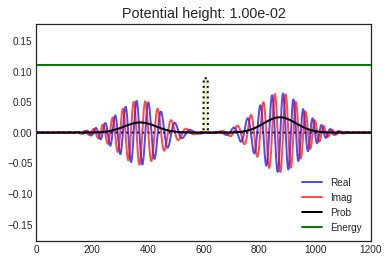

In [ ]:
# Test: Solución Numérica de la Ecuación de Schrödinger en una dimensión.

#=============================================================================
#
#               Quantum Mechanical Simulation using Finite-Difference
#               Time-Domain (FDTD) Method
#
#       This script simulates a probability wave in the presence of multiple
#       potentials.  The simulation is c arried out by using the FDTD algorithm
#       applied to the Schrodinger equation.  The program is intended to act as
#       a demonstration of the FDTD algorithm and can be used as an educational
#       aid for quantum mechanics and numerical methods.  The simulation
#       parameters are defined in the code constants and can be freely
#       manipulated to see different behaviors.
#
#       NOTES
#
#       The probability density plots are amplified by a factor for visual
#       purposes.  The psi_p quanity contains the actual probability density
#       without any rescaling.
#
#       BEWARE: The time step, dt, has strict requirements or else the
#       simulation becomes unstable.
#
#       The code has three built-in potential functions for demonstration.
#
#       1) Constant potential: Demonstrates a free particle with dispersion.
#
#       2) Step potential: Demonstrates transmission and reflection.
#
#       3) Potential barrier: Demonstrates tunneling.
#
#       By tweaking the height of the potential (V0 below) as well as the
#       barrier thickness (THCK below), you can see different behaviors: full
#       reflection with no noticeable transmission, transmission and
#       reflection, or mostly transmission with tunneling.
#
#               This script requires pylab and numpy to be installed with
#               Python or else it will not run.
#
#============================================================================
# Author:  James Nagel <nagel@mers.byu.edu>
#          5/25/07
#
# Updates by Fernando Perez <Fernando.Perez@colorado.edu>, 7/28/07
#============================================================================
#  Numerical and plotting libraries
import numpy as np
import pylab
# Set pylab to interactive mode so plots update when run outside ipython
pylab.ion()
#=============================================================================
# Utility functions
#  Defines a quick Gaussian pulse function to act as an envelope to the wave
#  function.
def Gaussian(x,t,sigma):
    """  A Gaussian curve.
        x = Variable
        t = time shift
        sigma = standard deviation      """
    return np.exp(-(x-t)**2/(2*sigma**2))
def free(npts):
    "Free particle."
    return np.zeros(npts)
def step(npts,v0):
    "Potential step"
    v = free(npts)
    v[npts//2:] = v0
    return v
def barrier(npts,v0,thickness):
    "Barrier potential"
    v = free(npts)
    v[npts//2:npts//2+thickness] = v0
    return v
def fillax(x,y,*args,**kw):
    """Fill the space between an array of y values and the x axis.
    All args/kwargs are passed to the pylab.fill function.
    Returns the value of the pylab.fill() call.
    """
    xx = np.concatenate((x,np.array([x[-1],x[0]],x.dtype)))
    yy = np.concatenate((y,np.zeros(2,y.dtype)))
    return pylab.fill(xx, yy, *args,**kw)

#=============================================================================
#
#  Simulation Constants.  Be sure to include decimal points on appropriate
#  variables so they become floats instead of integers.
#
N    = 1200     #  Number of spatial points.
T    = 5*N      #  Number of time steps.  5*N is a nice value for terminating
                #  before anything reaches the boundaries.
Tp   = 50       #  Number of time steps to increment before updating the plot.
dx   = 1.0e0    #  Spatial resolution
m    = 1.0e0    #  Particle mass
hbar = 1.0e0    #  Plank's constant
X    = dx*np.linspace(0,N,N)        #  Spatial axis.
# Potential parameters.  By playing with the type of potential and the height
# and thickness (for barriers), you'll see the various transmission/reflection
# regimes of quantum mechanical tunneling.
V0   = 1.0e-2   #  Potential amplitude (used for steps and barriers)
THCK = 15       # "Thickness" of the potential barrier (if appropriate
                # V-function is chosen)

# Uncomment the potential type you want to use here:
# Zero potential, packet propagates freely.
#POTENTIAL = 'free'
# Potential step.  The height (V0) of the potential chosen above will determine
# the amount of reflection/transmission you'll observe
#POTENTIAL = 'step'
# Potential barrier.  Note that BOTH the potential height (V0) and thickness
# of the barrier (THCK) affect the amount of tunneling vs reflection you'll
# observe.
POTENTIAL = 'barrier'

#  Initial wave function constants
sigma = 40.0 # Standard deviation on the Gaussian envelope (remember Heisenberg
             #  uncertainty).
x0 = round(N//2) - 5*sigma # Time shift
k0 = np.pi/20 # Wavenumber (note that energy is a function of k)
# Energy for a localized gaussian wavepacket interacting with a localized
# potential (so the interaction term can be neglected by computing the energy
# integral over a region where V=0)
E = (hbar**2/2.0/m)*(k0**2+0.5/sigma**2)
#=============================================================================
# Code begins
#
# You shouldn't need to change anything below unless you want to actually play
# with the numerical algorithm or modify the plotting.
#
#  Fill in the appropriate potential function (is there a Python equivalent to
#  the SWITCH statement?).
if POTENTIAL=='free':
    V = free(N)
elif POTENTIAL=='step':
    V = step(N,V0)
elif POTENTIAL=='barrier':
    V = barrier(N,V0,THCK)
else:
    raise ValueError("Unrecognized potential type: %s" % POTENTIAL)
#  More simulation parameters.  The maximum stable time step is a function of
#  the potential, V.
Vmax = V.max()            #  Maximum potential of the domain.
dt   = hbar/(2*hbar**2/(m*dx**2)+Vmax)         #  Critical time step.
c1   = hbar*dt/(m*dx**2)                       #  Constant coefficient 1.
c2   = 2*dt/hbar                               #  Constant coefficient 2.
c2V  = c2*V  # pre-compute outside of update loop
# Print summary info
print('One-dimensional Schrodinger equation - time evolution')
print('Wavepacket energy:   ',E)
print('Potential type:      ',POTENTIAL)
print('Potential height V0: ',V0)
print('Barrier thickness:   ',THCK)
#  Wave functions.  Three states represent past, present, and future.
psi_r = np.zeros((3,N)) #  Real
psi_i = np.zeros((3,N)) #  Imaginary
psi_p = np.zeros(N,)   # Observable probability (magnitude-squared
                          #  of the complex wave function).
#  Temporal indexing constants, used for accessing rows of the wavefunctions.
PA = 0                 #  Past
PR = 1                 #  Present
FU = 2                 #  Future
#  Initialize wave function.  A present-only state will "split" with half the
#  wave function propagating to the left and the other half to the right.
#  Including a "past" state will cause it to propagate one way.
xn = range(1,N//2)
x = X[xn]/dx    #  Normalized position coordinate
gg = Gaussian(x,x0,sigma)
cx = np.cos(k0*x)
sx = np.sin(k0*x)
psi_r[PR,xn] = cx*gg
psi_i[PR,xn] = sx*gg
psi_r[PA,xn] = cx*gg
psi_i[PA,xn] = sx*gg
# Initial normalization of wavefunctions
#   Compute the observable probability.
psi_p = psi_r[PR]**2 + psi_i[PR]**2
#  Normalize the wave functions so that the total probability in the simulation
#  is equal to 1.
P   = dx * psi_p.sum()                      #  Total probability.
nrm = np.sqrt(P)
psi_r /= nrm
psi_i /= nrm
psi_p /= P
#  Initialize the figure and axes.
pylab.figure()
xmin = X.min()
xmax = X.max()
ymax = 1.5*(psi_r[PR]).max()
pylab.axis([xmin,xmax,-ymax,ymax])
#  Initialize the plots with their own line objects.  The figures plot MUCH
#  faster if you simply update the lines as opposed to redrawing the entire
#  figure.  For reference, include the potential function as well.
lineR, = pylab.plot(X,psi_r[PR],'b',alpha=0.7,label='Real')
lineI, = pylab.plot(X,psi_i[PR],'r',alpha=0.7,label='Imag')
lineP, = pylab.plot(X,6*psi_p,'k',label='Prob')
pylab.title('Potential height: %.2e' % V0)
# For non-zero potentials, plot them and shade the classically forbidden region
# in light red, as well as drawing a green line at the wavepacket's total
# energy, in the same units the potential is being plotted.
if Vmax !=0 :
    # Scaling factor for energies, so they fit in the same plot as the
    # wavefunctions
    Efac = ymax/2.0/Vmax
    V_plot = V*Efac
    pylab.plot(X,V_plot,':k',zorder=0)   #  Potential line.
    fillax(X,V_plot, facecolor='y', alpha=0.2,zorder=0)
    # Plot the wavefunction energy, in the same scale as the potential
    pylab.axhline(E*Efac,color='g',label='Energy',zorder=1)
pylab.legend(loc='lower right')
pylab.draw()
# I think there's a problem with pylab, because it resets the xlim after
# plotting the E line.  Fix it back manually.
pylab.xlim(xmin,xmax)
#  Direct index assignment is MUCH faster than using a spatial FOR loop, so
#  these constants are used in the update equations.  Remember that Python uses
#  zero-based indexing.
IDX1 = range(1,N-1)                            #  psi [ k ]
IDX2 = range(2,N)                              #  psi [ k + 1 ]
IDX3 = range(0,N-2)                            #  psi [ k - 1 ]
for t in range(T+1):
    # Precompute a couple of indexing constants, this speeds up the computation
    psi_rPR = psi_r[PR]
    psi_iPR = psi_i[PR]
    #  Apply the update equations.
    psi_i[FU,IDX1] = psi_i[PA,IDX1] + \
                      c1*(psi_rPR[IDX2] - 2*psi_rPR[IDX1] +
                          psi_rPR[IDX3])
    psi_i[FU] -= c2V*psi_r[PR]

    psi_r[FU,IDX1] = psi_r[PA,IDX1] - \
                      c1*(psi_iPR[IDX2] - 2*psi_iPR[IDX1] +
                          psi_iPR[IDX3])
    psi_r[FU] += c2V*psi_i[PR]
    #  Increment the time steps.  PR -> PA and FU -> PR
    psi_r[PA] = psi_rPR
    psi_r[PR] = psi_r[FU]
    psi_i[PA] = psi_iPR
    psi_i[PR] = psi_i[FU]
    #  Only plot after a few iterations to make the simulation run faster.
    if t % Tp == 0:
        #  Compute observable probability for the plot.
        psi_p = psi_r[PR]**2 + psi_i[PR]**2
        #  Update the plots.
        lineR.set_ydata(psi_r[PR])
        lineI.set_ydata(psi_i[PR])
        # Note: we plot the probability density amplified by a factor so it's a
        # bit easier to see.
        lineP.set_ydata(6*psi_p)

        pylab.draw()
# So the windows don't auto-close at the end if run outside ipython
pylab.ioff()
pylab.show()
